In [ ]:
!pwd

/content


In [ ]:
from google.colab import files
import numpy as np

In [ ]:
uploaded = files.upload()

Saving 3d_0.npy to 3d_0.npy


In [ ]:
coordinate = np.load('/content/3d_0.npy')

In [ ]:
coordinate.shape

(16, 3, 2)

In [ ]:
movie_path = "/content/drive/MyDrive/Colab Notebooks/clipping_video.mp4"

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

movie_cap = cv2.VideoCapture(movie_path)
ret, frame = movie_cap.read()

if not ret:
  print('no_maskimage')

cv2_imshow(frame)

In [ ]:
coordinate[0].shape

(3, 2)

In [ ]:
frame.shape[0]

720

In [ ]:
coordinates =  (int(coordinate[0][0][0] * frame.shape[0]), int(coordinate[0][1][0] * frame.shape[1]))

In [ ]:
cv2_imshow(cv2.circle(frame, coordinates, 5, (0,255,255), thickness=-1))

# 重心 ワンフレームのみ出してみる

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/アーカイブ/２人できるかチェック

/content/drive/.shortcut-targets-by-id/1HjTsvhOf3cYRRgQPVexYQxhMZAubwqU_/アーカイブ/２人できるかチェック


In [ ]:
!ls

2つのcsvから動画に骨格を貼り付ける.ipynb  result.mp4
3d_0.npy				  sample_2.mp4
first_out_csv				  second_out_csv
mediapipe-python-sample			  subplot_tb.png
output


In [ ]:
import numpy as np
height=1.7
weight=60

# body_length:
foot_length = 0.26 / 1.70 * height
leg_length = 0.43 / 1.70 * height  # from ankle to knee
thigh_length = 0.43 / 1.70 * height  # from knee to troachanter
torso_length = 0.5 / 1.70 * height  # from trochanter to neck
head_length = 0.28 / 1.70 * height  # from neck to head-top
arm_length = 0.3 / 1.70 * height
forearm_length = 0.25 / 1.70 * height
hand_length = 0.19 / 1.70 * height
# body_weight:
foot_weight = -0.26784 + 2.61804 * foot_length + 0.00545 * weight
leg_weight = -1.71524 + 6.04396 * leg_length + 0.03885 * weight
thigh_weight = -4.53542 + 14.5253 * thigh_length + 0.09324 * weight
pelvis_weight = (-10.1647 + 18.7503 * torso_length + 0.48275 * weight) * (163/592)#座位時の肩峰高/超骨稜高
head_weight = -1.1968 + 25.9526 * head_length + 0.02604 * weight
arm_weight = -0.36785 + 1.15588 * arm_length + 0.02712 * weight
forearm_weight = -0.43807 + 2.22923 * forearm_length + 0.01397 * weight
hand_weight = -0.01474 + 2.09424 * hand_length + 0.00414 * weight
torso_weight = weight \
                    - (foot_weight + leg_weight + thigh_weight
                    + arm_weight + forearm_weight + hand_weight) * 2\
                    - pelvis_weight - head_weight

In [ ]:
torso_weight

15.700925916891894

In [ ]:
weights = np.array([head_weight, torso_weight,
                            thigh_weight,thigh_weight, leg_weight, leg_weight,
                            foot_weight, foot_weight, arm_weight, arm_weight,
                            forearm_weight, forearm_weight, hand_weight, hand_weight,])
'''
[head_x,torso_x,r_thigh_x,l_thigh_x,r_leg_x,l_leg_x,r_foot_x,l_foot_x,r_arm_x,
 l_arm_x,r_forearm_x,l_forearm_x,r_hand_x,l_hand_x]
'''

'\n[head_x,torso_x,r_thigh_x,l_thigh_x,r_leg_x,l_leg_x,r_foot_x,l_foot_x,r_arm_x,\n l_arm_x,r_forearm_x,l_forearm_x,r_hand_x,l_hand_x]\n'

In [ ]:
coordinate.shape

In [ ]:
a = np.array([i for i in coordinate])
print(len(a))

16


In [ ]:
b = ['RHip',
'LHip',
'RKnee',
'LKnee',
'RAnkle',
'LAnkle',
'Spine',
'Neck',
'RShoulder',
'LShoulder',
'RElbow',
'RWrist',
'LElbow',
'LWrist',
'Site',
'Head']

In [ ]:
data = {x:y for x,y in zip(b, a)}
data

{'RHip': array([[0.        , 0.08863907],
        [0.        , 0.0092483 ],
        [0.3270761 , 0.31345075]], dtype=float32),
 'LHip': array([[ 0.        , -0.08792416],
        [ 0.        , -0.00981308],
        [ 0.3270761 ,  0.34110457]], dtype=float32),
 'RKnee': array([[0.08863907, 0.11924265],
        [0.0092483 , 0.40186578],
        [0.31345075, 0.15688151]], dtype=float32),
 'LKnee': array([[-0.08792416,  0.09593149],
        [-0.00981308,  0.28484172],
        [ 0.34110457,  0.15529975]], dtype=float32),
 'RAnkle': array([[0.11924265, 0.0854547 ],
        [0.40186578, 0.80601156],
        [0.15688151, 0.00116563]], dtype=float32),
 'LAnkle': array([[0.09593149, 0.27761078],
        [0.28484172, 0.62442946],
        [0.15529975, 0.        ]], dtype=float32),
 'Spine': array([[ 0.        , -0.07235461],
        [ 0.        , -0.10814238],
        [ 0.3270761 ,  0.4594723 ]], dtype=float32),
 'Neck': array([[-0.07235461, -0.11933696],
        [-0.10814238, -0.1598581 ],
      

In [ ]:
data['Head']

array([[-0.15578702, -0.17609426],
       [-0.0768618 , -0.12375399],
       [ 0.6565095 ,  0.73399436]], dtype=float32)

In [ ]:
data['Site']

array([[-0.11933696, -0.15578702],
       [-0.1598581 , -0.0768618 ],
       [ 0.65422106,  0.6565095 ]], dtype=float32)

In [ ]:
data['All_Head'] = (data['Head'] + data['Site'])/2

In [ ]:
data['All_Head'][0]

array([-0.13756199, -0.16594064], dtype=float32)

In [ ]:

#頭の座標
head_x=data['All_Head'][0][1]
head_y=data['All_Head'][1][1]
head_z=data['All_Head'][2][1]

#胴体の座標
torso_x=(data['RShoulder'][0][1]+data['LShoulder'][0][1]+data['RHip'][0][1]+data['LHip'][0][1])/4
torso_y=(data['RShoulder'][1][1]+data['LShoulder'][1][1]+data['RHip'][1][1]+data['LHip'][1][1])/4
torso_z=(data['RShoulder'][2][1]+data['LShoulder'][2][1]+data['RHip'][2][1]+data['LHip'][2][1])/4

#大腿の座標
r_thigh_x=(data['RHip'][0][1]+data['RKnee'][0][1])/2
r_thigh_y=(data['RHip'][1][1]+data['RKnee'][1][1])/2
r_thigh_z=(data['RHip'][2][1]+data['RKnee'][2][1])/2

l_thigh_x=(data['LHip'][0][1]+data['LKnee'][0][1])/2
l_thigh_y=(data['LHip'][1][1]+data['LKnee'][1][1])/2
l_thigh_z=(data['LHip'][2][1]+data['LKnee'][2][1])/2

#下腿の座標
r_leg_x=(data['RKnee'][0][1]+data['RAnkle'][0][1])/2
r_leg_y=(data['RKnee'][1][1]+data['RAnkle'][1][1])/2
r_leg_z=(data['RKnee'][2][1]+data['RAnkle'][2][1])/2

l_leg_x=(data['LKnee'][0][1]+data['LAnkle'][0][1])/2
l_leg_y=(data['LKnee'][1][1]+data['LAnkle'][1][1])/2
l_leg_z=(data['LKnee'][2][1]+data['LAnkle'][2][1])/2

#足の座標（ここでは膝にする）
r_foot_x=data['RKnee'][0][1]
r_foot_y=data['RKnee'][1][1]
r_foot_z=data['RKnee'][2][1]

l_foot_x=data['LKnee'][0][1]
l_foot_y=data['LKnee'][1][1]
l_foot_z=data['LKnee'][2][1]

#上腕の座標
r_arm_x=(data['RShoulder'][0][1]+data['RElbow'][0][1])/2
r_arm_y=(data['RShoulder'][1][1]+data['RElbow'][1][1])/2
r_arm_z=(data['RShoulder'][2][1]+data['RElbow'][2][1])/2

l_arm_x=(data['LShoulder'][0][1]+data['LElbow'][0][1])/2
l_arm_y=(data['LShoulder'][1][1]+data['LElbow'][1][1])/2
l_arm_z=(data['LShoulder'][2][1]+data['LElbow'][2][1])/2

#前腕の座標
r_forearm_x=(data['RElbow'][0][1]+data['RWrist'][0][1])/2
r_forearm_y=(data['RElbow'][1][1]+data['RWrist'][1][1])/2
r_forearm_z=(data['RElbow'][2][1]+data['RWrist'][2][1])/2

l_forearm_x=(data['LElbow'][0][1]+data['LWrist'][0][1])/2
l_forearm_y=(data['LElbow'][1][1]+data['LWrist'][1][1])/2
l_forearm_z=(data['LElbow'][2][1]+data['LWrist'][2][1])/2

#手の座標（ここでは手首にする）
r_hand_x=data['RWrist'][0][1]
r_hand_y=data['RWrist'][1][1]
r_hand_z=data['RWrist'][2][1]

l_hand_x=data['LWrist'][0][1]
l_hand_y=data['LWrist'][1][1]
l_hand_z=data['LWrist'][2][1]

In [ ]:
weights=weights.astype(float)
#体の各部位の重心を求める
sum_list_x=[]
sum_list_y=[]
sum_list_z=[]
for i,name in enumerate(np.array([head_x,torso_x,r_thigh_x,l_thigh_x,r_leg_x,l_leg_x,r_foot_x,l_foot_x,r_arm_x,l_arm_x,r_forearm_x,l_forearm_x,r_hand_x,l_hand_x],dtype=float)):
  sum_list_x.append(weights[i]*name)

for i,name in enumerate(np.array([head_y,torso_y,r_thigh_y,l_thigh_y,r_leg_y,l_leg_y,r_foot_y,l_foot_y,r_arm_y,l_arm_y,r_forearm_y,l_forearm_y,r_hand_y,l_hand_y],dtype=float)):
  sum_list_y.append(weights[i]*name)
for i,name in enumerate(np.array([head_z,torso_z,r_thigh_z,l_thigh_z,r_leg_z,l_leg_z,r_foot_z,l_foot_z,r_arm_z,l_arm_z,r_forearm_z,l_forearm_z,r_hand_z,l_hand_z],dtype=float)):
  sum_list_z.append(weights[i]*name)

In [ ]:
#論文の重心を求める計算。各部位の重心を足し合わせて体重で割る
cog_x=sum(sum_list_x)/60
cog_y=sum(sum_list_y)/60
cog_z=sum(sum_list_z)/60

In [ ]:
data.pop('All_Head')
data

{'RHip': array([[0.        , 0.08863907],
        [0.        , 0.0092483 ],
        [0.3270761 , 0.31345075]], dtype=float32),
 'LHip': array([[ 0.        , -0.08792416],
        [ 0.        , -0.00981308],
        [ 0.3270761 ,  0.34110457]], dtype=float32),
 'RKnee': array([[0.08863907, 0.11924265],
        [0.0092483 , 0.40186578],
        [0.31345075, 0.15688151]], dtype=float32),
 'LKnee': array([[-0.08792416,  0.09593149],
        [-0.00981308,  0.28484172],
        [ 0.34110457,  0.15529975]], dtype=float32),
 'RAnkle': array([[0.11924265, 0.0854547 ],
        [0.40186578, 0.80601156],
        [0.15688151, 0.00116563]], dtype=float32),
 'LAnkle': array([[0.09593149, 0.27761078],
        [0.28484172, 0.62442946],
        [0.15529975, 0.        ]], dtype=float32),
 'Spine': array([[ 0.        , -0.07235461],
        [ 0.        , -0.10814238],
        [ 0.3270761 ,  0.4594723 ]], dtype=float32),
 'Neck': array([[-0.07235461, -0.11933696],
        [-0.10814238, -0.1598581 ],
      

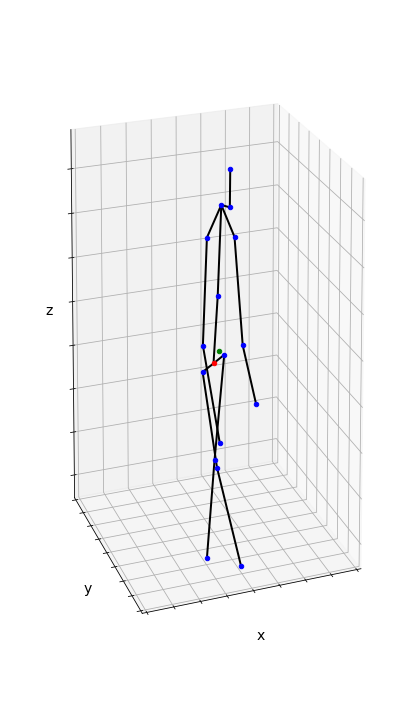

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    ax.scatter(cog_x, cog_y, cog_z, color='green')
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

show3Dpose(ax, coordinate)

# 白選手の重心を出す

In [ ]:
from itertools import chain

columns_name_list = [[f"/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_{n}.npy"] for n in range(4009)]
column_names = list(chain(*columns_name_list))
print(column_names)

['/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_0.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_1.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_2.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_3.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_4.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_5.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_6.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_7.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_8.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_9.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_10.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_11.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_12.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_13.npy', '/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_14.npy', '/content/drive/MyD

In [ ]:
import glob as gl
import numpy as np

# テストディレクトリにある「sam XXXX .csv」を取得する場合
name1 = gl.glob("/content/drive/MyDrive/Colab Notebooks/clipping_judo/3d_*.npy")
name1 = sorted(name1, key=column_names.index)
print(len(name1))
#print(name1)
# テストディレクトリにある全ファイル名を取得する場合
# name2 = gl.glob("test/*")

coordinates = []
for i in range(0, len(name1)):
    filename = name1[i]
    print(filename)
    temp = np.load(filename)
    coordinates.append(temp)
coordinates = np.array(coordinates)

In [ ]:
np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/clipping_judo/whiteplayer', coordinates=coordinates)
loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/whiteplayer.npz')
print(np.array_equal(coordinates, loaded['coordinates']))

True


In [ ]:
coordinates.shape

(4009, 16, 3, 2)

In [ ]:
list_=['RHip',
'LHip',
'RKnee',
'LKnee',
'RAnkle',
'LAnkle',
'Spine',
'Neck',
'RShoulder',
'LShoulder',
'RElbow',
'RWrist',
'LElbow',
'LWrist',
'Site',
'Head']

In [ ]:
import pandas as pd

cog_x_list=[]
cog_y_list=[]
cog_z_list=[]
for i in range(len(coordinates)):
    data = {x:y for x,y in zip(list_, coordinates[i])}
    data['All_Head'] = (data['Head'] + data['Site'])/2

    #頭の座標
    head_x=data['All_Head'][0][1]
    head_y=data['All_Head'][1][1]
    head_z=data['All_Head'][2][1]

    #胴体の座標
    torso_x=(data['RShoulder'][0][1]+data['LShoulder'][0][1]+data['RHip'][0][1]+data['LHip'][0][1])/4
    torso_y=(data['RShoulder'][1][1]+data['LShoulder'][1][1]+data['RHip'][1][1]+data['LHip'][1][1])/4
    torso_z=(data['RShoulder'][2][1]+data['LShoulder'][2][1]+data['RHip'][2][1]+data['LHip'][2][1])/4

    #大腿の座標
    r_thigh_x=(data['RHip'][0][1]+data['RKnee'][0][1])/2
    r_thigh_y=(data['RHip'][1][1]+data['RKnee'][1][1])/2
    r_thigh_z=(data['RHip'][2][1]+data['RKnee'][2][1])/2

    l_thigh_x=(data['LHip'][0][1]+data['LKnee'][0][1])/2
    l_thigh_y=(data['LHip'][1][1]+data['LKnee'][1][1])/2
    l_thigh_z=(data['LHip'][2][1]+data['LKnee'][2][1])/2

    #下腿の座標
    r_leg_x=(data['RKnee'][0][1]+data['RAnkle'][0][1])/2
    r_leg_y=(data['RKnee'][1][1]+data['RAnkle'][1][1])/2
    r_leg_z=(data['RKnee'][2][1]+data['RAnkle'][2][1])/2

    l_leg_x=(data['LKnee'][0][1]+data['LAnkle'][0][1])/2
    l_leg_y=(data['LKnee'][1][1]+data['LAnkle'][1][1])/2
    l_leg_z=(data['LKnee'][2][1]+data['LAnkle'][2][1])/2

    #足の座標（ここでは膝にする）
    r_foot_x=data['RKnee'][0][1]
    r_foot_y=data['RKnee'][1][1]
    r_foot_z=data['RKnee'][2][1]

    l_foot_x=data['LKnee'][0][1]
    l_foot_y=data['LKnee'][1][1]
    l_foot_z=data['LKnee'][2][1]

    #上腕の座標
    r_arm_x=(data['RShoulder'][0][1]+data['RElbow'][0][1])/2
    r_arm_y=(data['RShoulder'][1][1]+data['RElbow'][1][1])/2
    r_arm_z=(data['RShoulder'][2][1]+data['RElbow'][2][1])/2

    l_arm_x=(data['LShoulder'][0][1]+data['LElbow'][0][1])/2
    l_arm_y=(data['LShoulder'][1][1]+data['LElbow'][1][1])/2
    l_arm_z=(data['LShoulder'][2][1]+data['LElbow'][2][1])/2

    #前腕の座標
    r_forearm_x=(data['RElbow'][0][1]+data['RWrist'][0][1])/2
    r_forearm_y=(data['RElbow'][1][1]+data['RWrist'][1][1])/2
    r_forearm_z=(data['RElbow'][2][1]+data['RWrist'][2][1])/2

    l_forearm_x=(data['LElbow'][0][1]+data['LWrist'][0][1])/2
    l_forearm_y=(data['LElbow'][1][1]+data['LWrist'][1][1])/2
    l_forearm_z=(data['LElbow'][2][1]+data['LWrist'][2][1])/2

    #手の座標（ここでは手首にする）
    r_hand_x=data['RWrist'][0][1]
    r_hand_y=data['RWrist'][1][1]
    r_hand_z=data['RWrist'][2][1]

    l_hand_x=data['LWrist'][0][1]
    l_hand_y=data['LWrist'][1][1]
    l_hand_z=data['LWrist'][2][1]

    weights=weights.astype(float)
    #体の各部位の重心を求める
    sum_list_x=[]
    sum_list_y=[]
    sum_list_z=[]
    for i,name in enumerate(np.array([head_x,torso_x,r_thigh_x,l_thigh_x,r_leg_x,l_leg_x,r_foot_x,l_foot_x,r_arm_x,l_arm_x,r_forearm_x,l_forearm_x,r_hand_x,l_hand_x],dtype=float)):
        sum_list_x.append(weights[i]*name)

    for i,name in enumerate(np.array([head_y,torso_y,r_thigh_y,l_thigh_y,r_leg_y,l_leg_y,r_foot_y,l_foot_y,r_arm_y,l_arm_y,r_forearm_y,l_forearm_y,r_hand_y,l_hand_y],dtype=float)):
        sum_list_y.append(weights[i]*name)
    for i,name in enumerate(np.array([head_z,torso_z,r_thigh_z,l_thigh_z,r_leg_z,l_leg_z,r_foot_z,l_foot_z,r_arm_z,l_arm_z,r_forearm_z,l_forearm_z,r_hand_z,l_hand_y],dtype=float)):
        sum_list_z.append(weights[i]*name)

    #論文の重心を求める計算。各部位の重心を足し合わせて体重で割る
    cog_x=sum(sum_list_x)/60
    cog_y=sum(sum_list_y)/60
    cog_z=sum(sum_list_z)/60

    cog_x_list.append(cog_x)
    cog_y_list.append(cog_y)
    cog_z_list.append(cog_z)

cog_df=pd.DataFrame([cog_x_list,cog_y_list,cog_z_list],index=['cog_x','cog_y','cog_z']).T
# df=pd.concat([df,cog_df],axis=1)


In [ ]:
cog_df

,cog_x,cog_y,cog_z
0,-0.018042,0.069595,0.314342
1,-0.018087,0.069694,0.313229
2,-0.017565,0.070368,0.316359
3,-0.018272,0.069714,0.315887
4,-0.020160,0.069760,0.309090
...,...,...,...
4004,-0.007487,0.116273,0.395220
4005,-0.006676,0.116631,0.389381
4006,-0.005890,0.116242,0.383992
4007,-0.005377,0.114951,0.376847


In [ ]:
cog_df.to_csv("/content/drive/MyDrive/Colab Notebooks/all_center_coordinates.csv", index=False)

動画の重心

In [ ]:
import pandas as pd

cog_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_center_coordinates.csv")

In [ ]:
cog_df

,cog_x,cog_y,cog_z
0,-0.018042,0.069595,0.314342
1,-0.018087,0.069694,0.313229
2,-0.017565,0.070368,0.316359
3,-0.018272,0.069714,0.315887
4,-0.020160,0.069760,0.309090
...,...,...,...
4004,-0.007487,0.116273,0.395220
4005,-0.006676,0.116631,0.389381
4006,-0.005890,0.116242,0.383992
4007,-0.005377,0.114951,0.376847


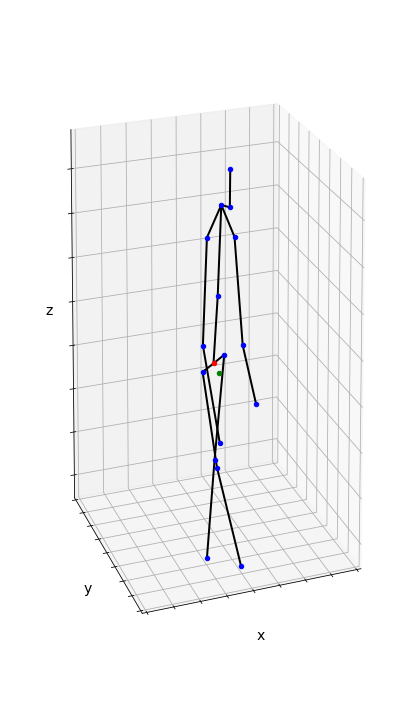

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    ax.scatter(cog_df['cog_x'][0], cog_df['cog_y'][0], cog_df['cog_z'][0], color='green')
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

show3Dpose(ax, coordinates[0])

重心座標の軌跡

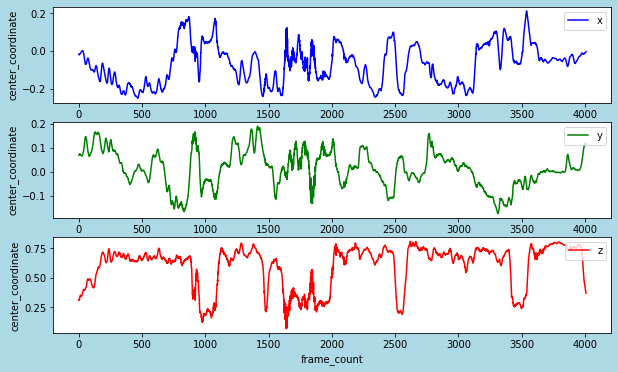

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = cog_df['cog_x'][sta:end]
y2 = cog_df['cog_y'][sta:end]
y3 = cog_df['cog_z'][sta:end]

c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'center_coordinate', 'center_coordinate', 'center_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

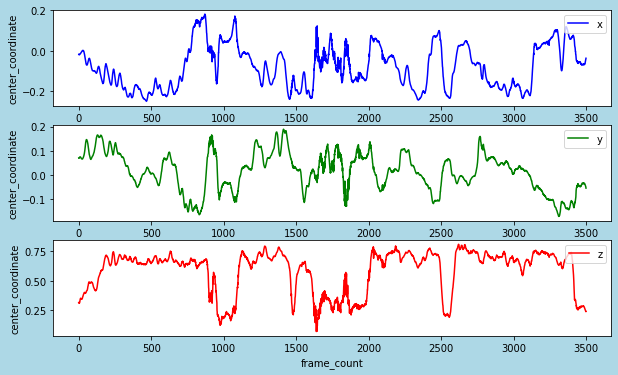

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 3500
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = cog_df['cog_x'][sta:end]
y2 = cog_df['cog_y'][sta:end]
y3 = cog_df['cog_z'][sta:end]

c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'center_coordinate', 'center_coordinate', 'center_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

In [ ]:
coordinates.shape

(4009, 16, 3, 2)

頭の座標

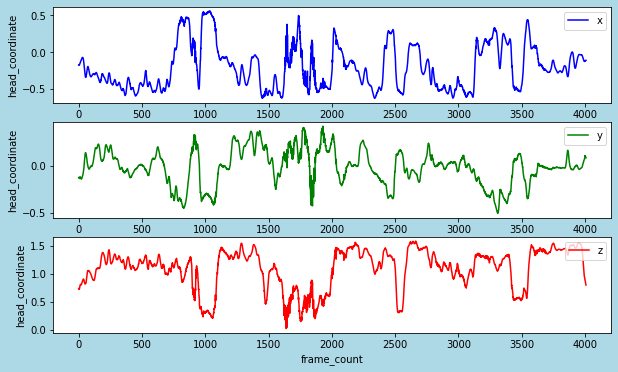

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = pd.DataFrame(coordinates[:,15,0,1], dtype='float64')[0][sta:end]
y2 = pd.DataFrame(coordinates[:,15,1,1], dtype='float64')[0][sta:end]
y3 = pd.DataFrame(coordinates[:,15,2,1], dtype='float64')[0][sta:end]

# y1 = [head for head in coordinates[:,15,0,1]].copy()
# y2 = [head for head in coordinates[:,15,1,1]].copy()
# y3 = [head for head in coordinates[:,15,2,1]].copy()

c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'head_coordinate', 'head_coordinate', 'head_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

In [ ]:
np.unique(pd.DataFrame(coordinates[:,15,0,1])[0].values == 4008.0)

array([False])

右手首の座標

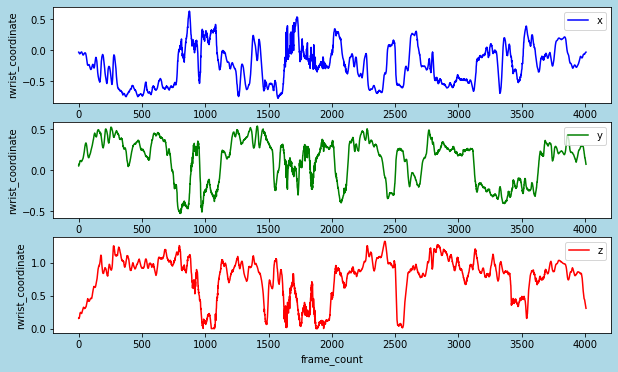

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = pd.DataFrame(coordinates[:,11,0,1], dtype='float64')[0][sta:end]
y2 = pd.DataFrame(coordinates[:,11,1,1], dtype='float64')[0][sta:end]
y3 = pd.DataFrame(coordinates[:,11,2,1], dtype='float64')[0][sta:end]


c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'rwrist_coordinate', 'rwrist_coordinate', 'rwrist_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

右肩の座標

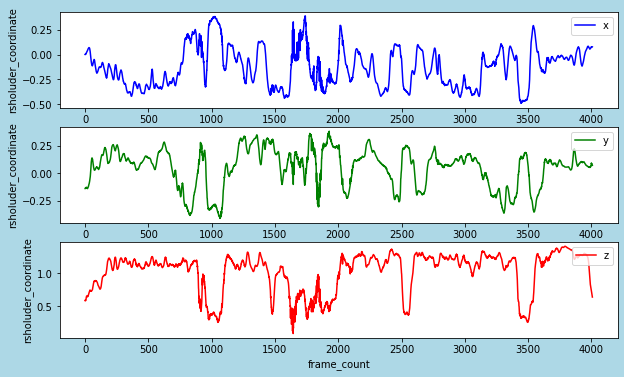

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = pd.DataFrame(coordinates[:,8,0,1], dtype='float64')[0][sta:end]
y2 = pd.DataFrame(coordinates[:,8,1,1], dtype='float64')[0][sta:end]
y3 = pd.DataFrame(coordinates[:,8,2,1], dtype='float64')[0][sta:end]


c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'rsholuder_coordinate', 'rsholuder_coordinate', 'rsholuder_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

くるぶし中点の軌跡

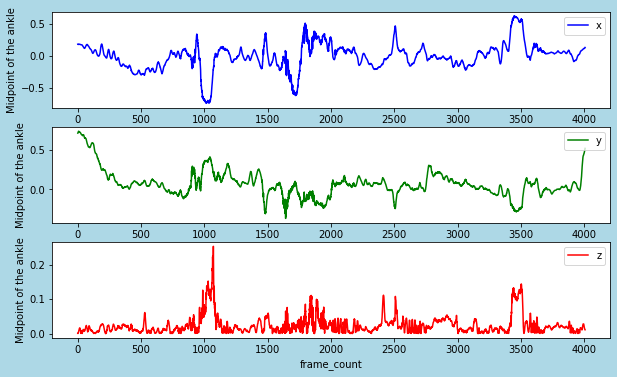

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y1 = ((pd.DataFrame(coordinates[:,4,0,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,0,1], dtype='float64')[0])/2)[sta:end]
y2 = ((pd.DataFrame(coordinates[:,4,1,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,1,1], dtype='float64')[0])/2)[sta:end]
y3 = ((pd.DataFrame(coordinates[:,4,2,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,2,1], dtype='float64')[0])/2)[sta:end]


c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'Midpoint of the ankle', 'Midpoint of the ankle', 'Midpoint of the ankle'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

くるぶし中点とくるぶし中点の高さに直した重心の距離

くるぶし中点を原点とする

In [ ]:
ankle_midpoint_x = ((pd.DataFrame(coordinates[:,4,0,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,0,1], dtype='float64')[0])/2)
ankle_midpoint_y = ((pd.DataFrame(coordinates[:,4,1,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,1,1], dtype='float64')[0])/2)
ankle_midpoint_z = ((pd.DataFrame(coordinates[:,4,2,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,2,1], dtype='float64')[0])/2)

In [ ]:
# くるぶしと重心の高さを合わせる
ankle_to_center_x = cog_df['cog_x'].copy()

ankle_to_center_y = cog_df['cog_y'].copy()

ankle_to_center_z = cog_df['cog_z'].copy()
ankle_to_center_z = ankle_midpoint_z
# z_ = ankle_to_center_z.copy()
# z_[:] = 0

In [ ]:
centroid_distance = np.sqrt((ankle_to_center_x - ankle_midpoint_x)**2 + (ankle_to_center_y - ankle_midpoint_y)**2 + (ankle_to_center_z - ankle_midpoint_z)**2)

In [ ]:
centroid_distance

0       0.675768
1       0.680174
2       0.680563
3       0.683966
4       0.689954
          ...   
4004    0.389050
4005    0.400502
4006    0.409093
4007    0.419092
4008    0.427601
Length: 4009, dtype: float64

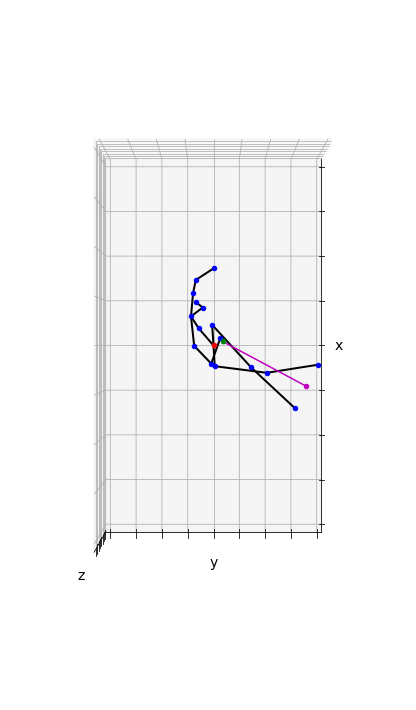

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    ax.scatter(ankle_to_center_x[0], ankle_to_center_y[0], ankle_to_center_z[0], color='c')
    # 重心
    ax.scatter(cog_df['cog_x'][0], cog_df['cog_y'][0], cog_df['cog_z'][0], color='green')
    #くるぶし中点
    ax.scatter(ankle_midpoint_x[0], ankle_midpoint_y[0], ankle_midpoint_z[0], color='m')
    ax.plot([ankle_midpoint_x[0],ankle_to_center_x[0]], [ankle_midpoint_y[0],ankle_to_center_y[0]], [ankle_midpoint_z[0],ankle_to_center_z[0]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)
    ax.view_init(elev=90, azim=0)
    plt.savefig('/content/drive/MyDrive/a.png')
show3Dpose(ax, coordinates[0])

くるぶしまで下ろした重心とくるぶし中点との距離

重心とくるぶしの距離の軌跡

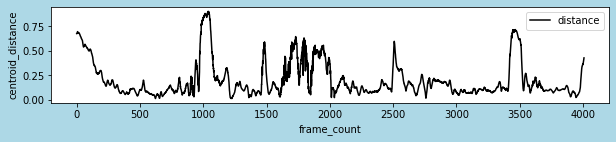

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = centroid_distance

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'centroid_distance'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

くるぶし高さの重心と重心の距離

In [ ]:
ankle_to_centroid_distance = np.sqrt((cog_df['cog_x'] - ankle_to_center_x)**2 + (cog_df['cog_y'] - ankle_to_center_y)**2 + (cog_df['cog_z'] - ankle_to_center_z)**2)

In [ ]:
ankle_to_centroid_distance

0       0.313759
1       0.313177
2       0.315574
3       0.314083
4       0.307238
          ...   
4004    0.382049
4005    0.376688
4006    0.371672
4007    0.364955
4008    0.358634
Length: 4009, dtype: float64

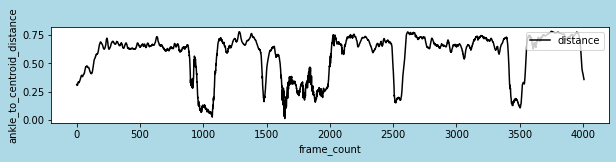

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = ankle_to_centroid_distance

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'ankle_to_centroid_distance'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

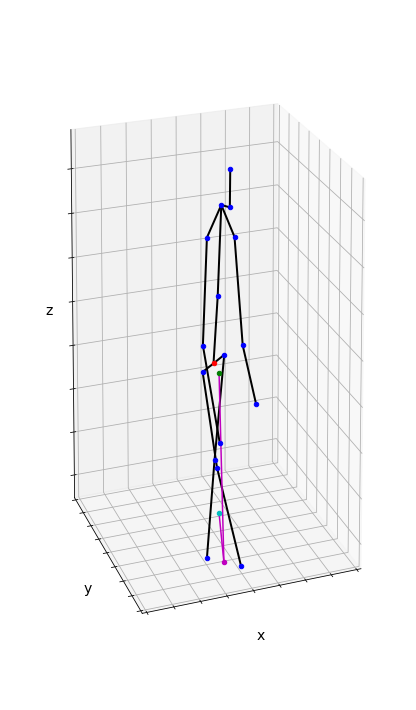

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    ax.scatter(ankle_to_center_x[0], ankle_to_center_y[0], ankle_to_center_z[0], color='c')
    # 重心
    ax.scatter(cog_df['cog_x'][0], cog_df['cog_y'][0], cog_df['cog_z'][0], color='green')
    #くるぶし中点
    ax.scatter(ankle_midpoint_x[0], ankle_midpoint_y[0], ankle_midpoint_z[0], color='m')
    ax.plot([ankle_midpoint_x[0],cog_df['cog_x'][0]], [ankle_midpoint_y[0],cog_df['cog_y'][0]], [ankle_midpoint_z[0],cog_df['cog_z'][0]], "o-", color="m", ms=4, mew=0.5)
    ax.plot([ankle_midpoint_x[0],ankle_to_center_x[0]], [ankle_midpoint_y[0],ankle_to_center_y[0]], [ankle_midpoint_z[0],ankle_to_center_z[0]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

show3Dpose(ax, coordinates[0])

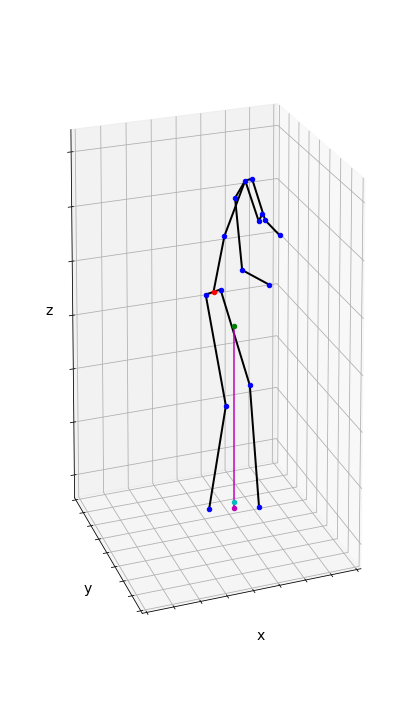

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    ax.scatter(ankle_to_center_x[3000], ankle_to_center_y[3000], ankle_to_center_z[3000], color='c')
    # 重心
    ax.scatter(cog_df['cog_x'][3000], cog_df['cog_y'][3000], cog_df['cog_z'][3000], color='green')
    #くるぶし中点
    ax.scatter(ankle_midpoint_x[3000], ankle_midpoint_y[3000], ankle_midpoint_z[3000], color='m')
    ax.plot([ankle_midpoint_x[3000],cog_df['cog_x'][3000]], [ankle_midpoint_y[3000],cog_df['cog_y'][3000]], [ankle_midpoint_z[3000],cog_df['cog_z'][3000]], "o-", color="m", ms=4, mew=0.5)
    ax.plot([ankle_midpoint_x[3000],ankle_to_center_x[3000]], [ankle_midpoint_y[3000],ankle_to_center_y[3000]], [ankle_midpoint_z[3000],ankle_to_center_z[3000]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/check.png')
show3Dpose(ax, coordinates[3000])

In [ ]:

# 点A,B,Cの座標（3次元座標上の場合）

# 重心
a = np.array([cog_df['cog_x'][3000], cog_df['cog_y'][3000], cog_df['cog_z'][3000]])
#　くるぶし中点
b = np.array([ankle_midpoint_x[3000], ankle_midpoint_y[3000], ankle_midpoint_z[3000]])
# くるぶし高さの重心
c = np.array([ankle_to_center_x[3000], ankle_to_center_y[3000], ankle_to_center_z[3000]])

# ベクトルを定義
vec_a = a - b
vec_c = c - b

# コサインの計算
length_vec_a = np.linalg.norm(vec_a, ord=2)
length_vec_c = np.linalg.norm(vec_c, ord=2)
inner_product = np.inner(vec_a, vec_c)
cos = inner_product / (length_vec_a * length_vec_c)

# 角度（ラジアン）の計算
rad = np.arccos(cos)

# 弧度法から度数法（rad ➔ 度）への変換
degree = np.rad2deg(rad)

In [ ]:
vec_a

array([-0.02627568, -0.0765667 ,  0.64527847])

In [ ]:
length_vec_a

0.6503361993600119

In [ ]:
degree

82.84963198626383

In [ ]:
rad

0.4346817470517157

In [ ]:
180 - 24.973111879449852779

155.02688812055015

# 角フレームの重心を動画にする

白選手のみ

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data, i = 0):
    ax.cla()
    ax.view_init(elev=15., azim=70)
    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data[i]):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for li in range(len(connections)):
        c = draw_list[li]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if li == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    ax.scatter(ankle_to_center_x[i], ankle_to_center_y[i], ankle_to_center_z[i], color='c')
    # 重心
    ax.scatter(cog_df['cog_x'][i], cog_df['cog_y'][i], cog_df['cog_z'][i], color='green')
    #くるぶし中点
    ax.scatter(ankle_midpoint_x[i], ankle_midpoint_y[i], ankle_midpoint_z[i], color='m')
    ax.plot([ankle_midpoint_x[i],cog_df['cog_x'][i]], [ankle_midpoint_y[i],cog_df['cog_y'][i]], [ankle_midpoint_z[i],cog_df['cog_z'][i]], "o-", color="m", ms=4, mew=0.5)
    ax.plot([ankle_midpoint_x[i],ankle_to_center_x[i]], [ankle_midpoint_y[i],ankle_to_center_y[i]], [ankle_midpoint_z[i],ankle_to_center_z[i]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)
    ax.view_init(elev=90, azim=0)
    plt.savefig(f'/content/3dpose_image_{frame_count}.png')

show3Dpose(ax, coordinates, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 全てのフレームに対するグラフを画像にする
frame_count = 0
# for i in range(len(coordinates)):
for i in range(3000,3001):
  show3Dpose(ax, coordinates, i)
  frame_count += 1

In [ ]:
# 動画作成する場合
import glob, re

from itertools import chain

columns_name_list = [[f"/content/3dpose_image_{n}*.png"] for n in range(len(coordinates))]
column_names = list(chain(*columns_name_list))
print(column_names)

filepath_list = glob.glob("/content/3dpose_image_*.png")
filepath_list = sorted(filepath_list, key=column_names.index)
print(len(filepath_list))

img_list = []
for file_path in filepath_list:
    img = cv2.imread(file_path)
    height, width, layers = img.shape
    size = (width, height)
    img_list.append(img)

out = cv2.VideoWriter('/content/coordinate_movie.mp4',
                      cv2.VideoWriter_fourcc(*'MP4V'),
                      5.0,
                      size)

for i in range(len(img_list)):
    out.write(img_list[i])
out.release()

In [ ]:
# 重心距離（底辺）×重心からくるぶし中点までの距離(高さ)÷2
centroid_distance

# 青選手の重心を出す

In [ ]:
# from google.colab import files
# import numpy as np

In [ ]:
# # ローカルの3次元座標ファイルを全て読み込む
# # 時間かかるからDriveにあげた方が良い
# uploaded = files.upload()

In [ ]:
from itertools import chain

columns_name_list = [[f"/content/3d_{n}.npy"] for n in range(4009)]
column_names = list(chain(*columns_name_list))
print(column_names)

['/content/3d_0.npy', '/content/3d_1.npy', '/content/3d_2.npy', '/content/3d_3.npy', '/content/3d_4.npy', '/content/3d_5.npy', '/content/3d_6.npy', '/content/3d_7.npy', '/content/3d_8.npy', '/content/3d_9.npy', '/content/3d_10.npy', '/content/3d_11.npy', '/content/3d_12.npy', '/content/3d_13.npy', '/content/3d_14.npy', '/content/3d_15.npy', '/content/3d_16.npy', '/content/3d_17.npy', '/content/3d_18.npy', '/content/3d_19.npy', '/content/3d_20.npy', '/content/3d_21.npy', '/content/3d_22.npy', '/content/3d_23.npy', '/content/3d_24.npy', '/content/3d_25.npy', '/content/3d_26.npy', '/content/3d_27.npy', '/content/3d_28.npy', '/content/3d_29.npy', '/content/3d_30.npy', '/content/3d_31.npy', '/content/3d_32.npy', '/content/3d_33.npy', '/content/3d_34.npy', '/content/3d_35.npy', '/content/3d_36.npy', '/content/3d_37.npy', '/content/3d_38.npy', '/content/3d_39.npy', '/content/3d_40.npy', '/content/3d_41.npy', '/content/3d_42.npy', '/content/3d_43.npy', '/content/3d_44.npy', '/content/3d_45.npy

In [ ]:
# import glob as gl
# import numpy as np

# # テストディレクトリにある「sam XXXX .csv」を取得する場合
# name1 = gl.glob("/content/3d_*.npy")
# name1 = sorted(name1, key=column_names.index)
# print(len(name1))
# #print(name1)
# # テストディレクトリにある全ファイル名を取得する場合
# # name2 = gl.glob("test/*")

# coordinates = []
# for i in range(0, len(name1)):
#     filename = name1[i]
#     print(filename)
#     temp = np.load(filename)
#     coordinates.append(temp)
# coordinates = np.array(coordinates)

In [ ]:
# np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/clipping_judo/buleplayer', coordinates=coordinates)
loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/buleplayer.npz')
# print(np.array_equal(coordinates, loaded['coordinates']))

In [ ]:
coordinates = loaded['coordinates']
print(coordinates.shape)

(4009, 16, 3, 2)


In [ ]:
import numpy as np
height=1.7
weight=60

# body_length:
foot_length = 0.26 / 1.70 * height
leg_length = 0.43 / 1.70 * height  # from ankle to knee
thigh_length = 0.43 / 1.70 * height  # from knee to troachanter
torso_length = 0.5 / 1.70 * height  # from trochanter to neck
head_length = 0.28 / 1.70 * height  # from neck to head-top
arm_length = 0.3 / 1.70 * height
forearm_length = 0.25 / 1.70 * height
hand_length = 0.19 / 1.70 * height
# body_weight:
foot_weight = -0.26784 + 2.61804 * foot_length + 0.00545 * weight
leg_weight = -1.71524 + 6.04396 * leg_length + 0.03885 * weight
thigh_weight = -4.53542 + 14.5253 * thigh_length + 0.09324 * weight
pelvis_weight = (-10.1647 + 18.7503 * torso_length + 0.48275 * weight) * (163/592)#座位時の肩峰高/超骨稜高
head_weight = -1.1968 + 25.9526 * head_length + 0.02604 * weight
arm_weight = -0.36785 + 1.15588 * arm_length + 0.02712 * weight
forearm_weight = -0.43807 + 2.22923 * forearm_length + 0.01397 * weight
hand_weight = -0.01474 + 2.09424 * hand_length + 0.00414 * weight
torso_weight = weight \
                    - (foot_weight + leg_weight + thigh_weight
                    + arm_weight + forearm_weight + hand_weight) * 2\
                    - pelvis_weight - head_weight

In [ ]:
weights = np.array([head_weight, torso_weight,
                            thigh_weight,thigh_weight, leg_weight, leg_weight,
                            foot_weight, foot_weight, arm_weight, arm_weight,
                            forearm_weight, forearm_weight, hand_weight, hand_weight,])
'''
[head_x,torso_x,r_thigh_x,l_thigh_x,r_leg_x,l_leg_x,r_foot_x,l_foot_x,r_arm_x,
 l_arm_x,r_forearm_x,l_forearm_x,r_hand_x,l_hand_x]
'''

'\n[head_x,torso_x,r_thigh_x,l_thigh_x,r_leg_x,l_leg_x,r_foot_x,l_foot_x,r_arm_x,\n l_arm_x,r_forearm_x,l_forearm_x,r_hand_x,l_hand_x]\n'

In [ ]:
list_=['RHip',
'LHip',
'RKnee',
'LKnee',
'RAnkle',
'LAnkle',
'Spine',
'Neck',
'RShoulder',
'LShoulder',
'RElbow',
'RWrist',
'LElbow',
'LWrist',
'Site',
'Head']

In [ ]:
import pandas as pd

cog_x_list=[]
cog_y_list=[]
cog_z_list=[]
for i in range(len(coordinates)):
    data = {x:y for x,y in zip(list_, coordinates[i])}
    data['All_Head'] = (data['Head'] + data['Site'])/2

    #頭の座標
    head_x=data['All_Head'][0][1]
    head_y=data['All_Head'][1][1]
    head_z=data['All_Head'][2][1]

    #胴体の座標
    torso_x=(data['RShoulder'][0][1]+data['LShoulder'][0][1]+data['RHip'][0][1]+data['LHip'][0][1])/4
    torso_y=(data['RShoulder'][1][1]+data['LShoulder'][1][1]+data['RHip'][1][1]+data['LHip'][1][1])/4
    torso_z=(data['RShoulder'][2][1]+data['LShoulder'][2][1]+data['RHip'][2][1]+data['LHip'][2][1])/4

    #大腿の座標
    r_thigh_x=(data['RHip'][0][1]+data['RKnee'][0][1])/2
    r_thigh_y=(data['RHip'][1][1]+data['RKnee'][1][1])/2
    r_thigh_z=(data['RHip'][2][1]+data['RKnee'][2][1])/2

    l_thigh_x=(data['LHip'][0][1]+data['LKnee'][0][1])/2
    l_thigh_y=(data['LHip'][1][1]+data['LKnee'][1][1])/2
    l_thigh_z=(data['LHip'][2][1]+data['LKnee'][2][1])/2

    #下腿の座標
    r_leg_x=(data['RKnee'][0][1]+data['RAnkle'][0][1])/2
    r_leg_y=(data['RKnee'][1][1]+data['RAnkle'][1][1])/2
    r_leg_z=(data['RKnee'][2][1]+data['RAnkle'][2][1])/2

    l_leg_x=(data['LKnee'][0][1]+data['LAnkle'][0][1])/2
    l_leg_y=(data['LKnee'][1][1]+data['LAnkle'][1][1])/2
    l_leg_z=(data['LKnee'][2][1]+data['LAnkle'][2][1])/2

    #足の座標（ここでは膝にする）
    r_foot_x=data['RKnee'][0][1]
    r_foot_y=data['RKnee'][1][1]
    r_foot_z=data['RKnee'][2][1]

    l_foot_x=data['LKnee'][0][1]
    l_foot_y=data['LKnee'][1][1]
    l_foot_z=data['LKnee'][2][1]

    #上腕の座標
    r_arm_x=(data['RShoulder'][0][1]+data['RElbow'][0][1])/2
    r_arm_y=(data['RShoulder'][1][1]+data['RElbow'][1][1])/2
    r_arm_z=(data['RShoulder'][2][1]+data['RElbow'][2][1])/2

    l_arm_x=(data['LShoulder'][0][1]+data['LElbow'][0][1])/2
    l_arm_y=(data['LShoulder'][1][1]+data['LElbow'][1][1])/2
    l_arm_z=(data['LShoulder'][2][1]+data['LElbow'][2][1])/2

    #前腕の座標
    r_forearm_x=(data['RElbow'][0][1]+data['RWrist'][0][1])/2
    r_forearm_y=(data['RElbow'][1][1]+data['RWrist'][1][1])/2
    r_forearm_z=(data['RElbow'][2][1]+data['RWrist'][2][1])/2

    l_forearm_x=(data['LElbow'][0][1]+data['LWrist'][0][1])/2
    l_forearm_y=(data['LElbow'][1][1]+data['LWrist'][1][1])/2
    l_forearm_z=(data['LElbow'][2][1]+data['LWrist'][2][1])/2

    #手の座標（ここでは手首にする）
    r_hand_x=data['RWrist'][0][1]
    r_hand_y=data['RWrist'][1][1]
    r_hand_z=data['RWrist'][2][1]

    l_hand_x=data['LWrist'][0][1]
    l_hand_y=data['LWrist'][1][1]
    l_hand_z=data['LWrist'][2][1]

    weights=weights.astype(float)
    #体の各部位の重心を求める
    sum_list_x=[]
    sum_list_y=[]
    sum_list_z=[]
    for i,name in enumerate(np.array([head_x,torso_x,r_thigh_x,l_thigh_x,r_leg_x,l_leg_x,r_foot_x,l_foot_x,r_arm_x,l_arm_x,r_forearm_x,l_forearm_x,r_hand_x,l_hand_x],dtype=float)):
        sum_list_x.append(weights[i]*name)

    for i,name in enumerate(np.array([head_y,torso_y,r_thigh_y,l_thigh_y,r_leg_y,l_leg_y,r_foot_y,l_foot_y,r_arm_y,l_arm_y,r_forearm_y,l_forearm_y,r_hand_y,l_hand_y],dtype=float)):
        sum_list_y.append(weights[i]*name)
    for i,name in enumerate(np.array([head_z,torso_z,r_thigh_z,l_thigh_z,r_leg_z,l_leg_z,r_foot_z,l_foot_z,r_arm_z,l_arm_z,r_forearm_z,l_forearm_z,r_hand_z,l_hand_y],dtype=float)):
        sum_list_z.append(weights[i]*name)

    #論文の重心を求める計算。各部位の重心を足し合わせて体重で割る
    cog_x=sum(sum_list_x)/60
    cog_y=sum(sum_list_y)/60
    cog_z=sum(sum_list_z)/60

    cog_x_list.append(cog_x)
    cog_y_list.append(cog_y)
    cog_z_list.append(cog_z)

cog_df=pd.DataFrame([cog_x_list,cog_y_list,cog_z_list],index=['cog_x','cog_y','cog_z']).T
# df=pd.concat([df,cog_df],axis=1)


In [ ]:
cog_df

,cog_x,cog_y,cog_z
0,0.064630,0.029747,0.305291
1,0.063275,0.029674,0.306141
2,0.062653,0.028881,0.304306
3,0.062412,0.028038,0.310676
4,0.060845,0.026706,0.305592
...,...,...,...
4004,0.045884,0.000103,0.244069
4005,0.042176,-0.000412,0.240092
4006,0.038518,-0.001968,0.233349
4007,0.034620,-0.004069,0.226699


In [ ]:
cog_df.to_csv("/content/drive/MyDrive/Colab Notebooks/blueplayer_all_center_coordinates.csv", index=False)

動画の重心

In [ ]:
import pandas as pd

cog_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/blueplayer_all_center_coordinates.csv")

In [ ]:
cog_df

,cog_x,cog_y,cog_z
0,0.064630,0.029747,0.305291
1,0.063275,0.029674,0.306141
2,0.062653,0.028881,0.304306
3,0.062412,0.028038,0.310676
4,0.060845,0.026706,0.305592
...,...,...,...
4004,0.045884,0.000103,0.244069
4005,0.042176,-0.000412,0.240092
4006,0.038518,-0.001968,0.233349
4007,0.034620,-0.004069,0.226699


In [ ]:
movie_path = "/content/drive/MyDrive/Colab Notebooks/2018WCB_60_P2_SELLO Edwin_BOT_NAZIR BIN Abdou_MAD.mp4"

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

movie_cap = cv2.VideoCapture(movie_path)
movie_cap.set(cv2.CAP_PROP_POS_FRAMES, 1825)
ret, frame = movie_cap.read()

if not ret:
  print('no_maskimage')

cv2_imshow(frame)

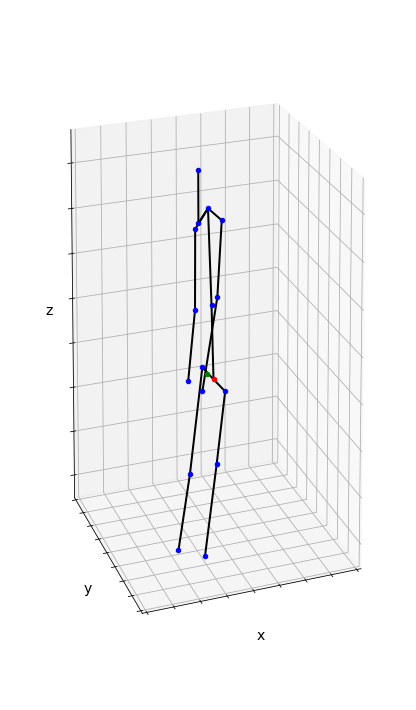

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    ax.scatter(cog_df['cog_x'][0], cog_df['cog_y'][0], cog_df['cog_z'][0], color='green')
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

show3Dpose(ax, coordinates[0])

重心座標の軌跡

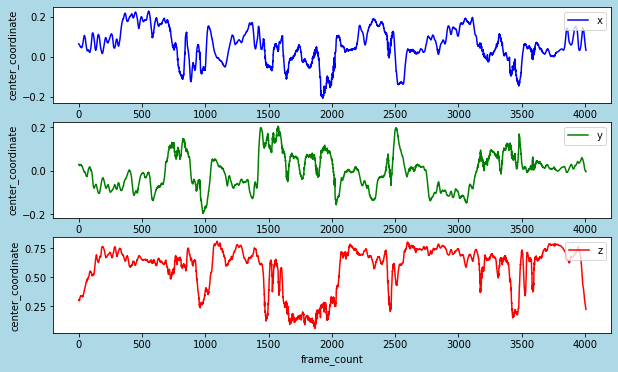

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = cog_df['cog_x'][sta:end]
y2 = cog_df['cog_y'][sta:end]
y3 = cog_df['cog_z'][sta:end]

c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'center_coordinate', 'center_coordinate', 'center_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

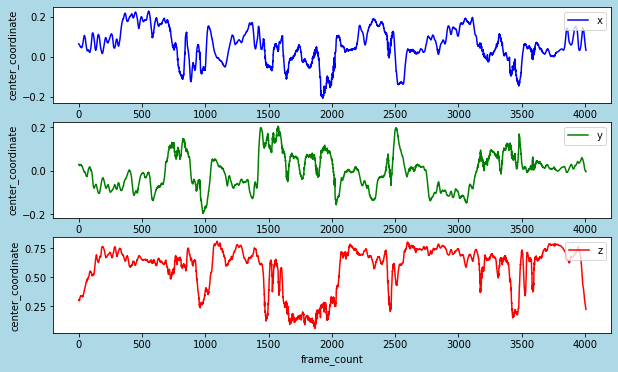

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = cog_df['cog_x'][sta:end]
y2 = cog_df['cog_y'][sta:end]
y3 = cog_df['cog_z'][sta:end]

c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'center_coordinate', 'center_coordinate', 'center_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

In [ ]:
coordinates.shape

(4009, 16, 3, 2)

頭の座標

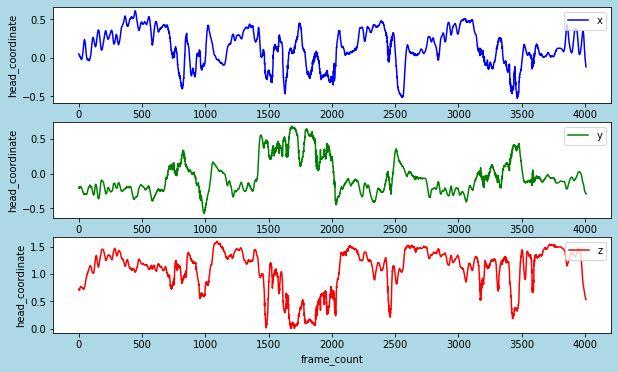

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = pd.DataFrame(coordinates[:,15,0,1], dtype='float64')[0][sta:end]
y2 = pd.DataFrame(coordinates[:,15,1,1], dtype='float64')[0][sta:end]
y3 = pd.DataFrame(coordinates[:,15,2,1], dtype='float64')[0][sta:end]

# y1 = [head for head in coordinates[:,15,0,1]].copy()
# y2 = [head for head in coordinates[:,15,1,1]].copy()
# y3 = [head for head in coordinates[:,15,2,1]].copy()

c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'head_coordinate', 'head_coordinate', 'head_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

In [ ]:
np.unique(pd.DataFrame(coordinates[:,15,0,1])[0].values == 4008.0)

array([False])

右手首の座標

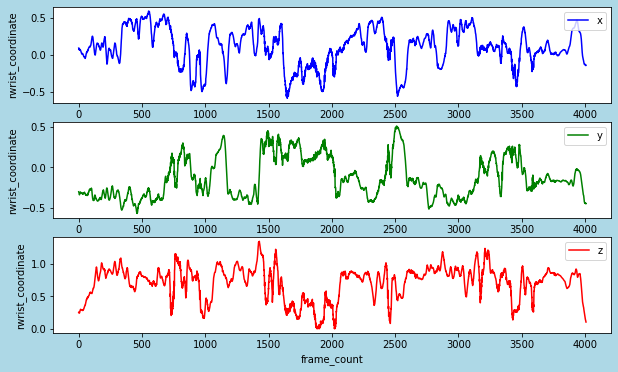

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = pd.DataFrame(coordinates[:,11,0,1], dtype='float64')[0][sta:end]
y2 = pd.DataFrame(coordinates[:,11,1,1], dtype='float64')[0][sta:end]
y3 = pd.DataFrame(coordinates[:,11,2,1], dtype='float64')[0][sta:end]


c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'rwrist_coordinate', 'rwrist_coordinate', 'rwrist_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

右肩の座標

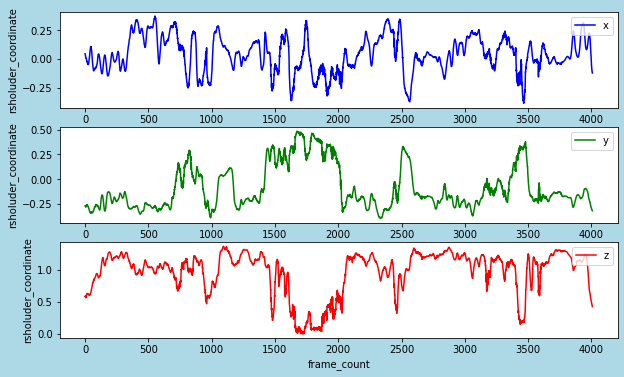

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = pd.DataFrame(coordinates[:,8,0,1], dtype='float64')[0][sta:end]
y2 = pd.DataFrame(coordinates[:,8,1,1], dtype='float64')[0][sta:end]
y3 = pd.DataFrame(coordinates[:,8,2,1], dtype='float64')[0][sta:end]


c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'rsholuder_coordinate', 'rsholuder_coordinate', 'rsholuder_coordinate'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

くるぶし中点の軌跡

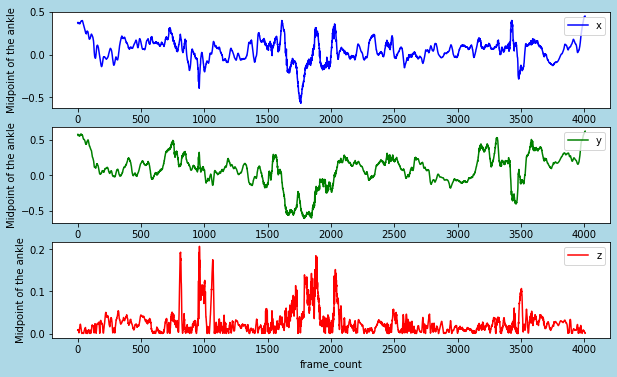

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y1 = ((pd.DataFrame(coordinates[:,4,0,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,0,1], dtype='float64')[0])/2)[sta:end]
y2 = ((pd.DataFrame(coordinates[:,4,1,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,1,1], dtype='float64')[0])/2)[sta:end]
y3 = ((pd.DataFrame(coordinates[:,4,2,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,2,1], dtype='float64')[0])/2)[sta:end]


c1, c2, c3 = 'blue', 'green', 'red'
l1, l2, l3= 'x', 'y', 'z'

xl1, xl2, xl3 = 'frame_count', 'frame_count', 'frame_count'
yl1, yl2 ,yl3= 'Midpoint of the ankle', 'Midpoint of the ankle', 'Midpoint of the ankle'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)
ax3.plot(x, y3, color=c3, label=l3)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)
ax3.set_xlabel(xl3)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)
ax3.set_ylabel(yl3)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

くるぶし中点とくるぶし中点の高さに直した重心の距離

くるぶし中点を原点とする

In [ ]:
ankle_midpoint_x = ((pd.DataFrame(coordinates[:,4,0,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,0,1], dtype='float64')[0])/2)
ankle_midpoint_y = ((pd.DataFrame(coordinates[:,4,1,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,1,1], dtype='float64')[0])/2)
ankle_midpoint_z = ((pd.DataFrame(coordinates[:,4,2,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,5,2,1], dtype='float64')[0])/2)

In [ ]:
# くるぶしと重心の高さを合わせる
ankle_to_center_x = cog_df['cog_x'].copy()

ankle_to_center_y = cog_df['cog_y'].copy()

ankle_to_center_z = cog_df['cog_z'].copy()
ankle_to_center_z = ankle_midpoint_z
# z_ = ankle_to_center_z.copy()
# z_[:] = 0

In [ ]:
centroid_distance = np.sqrt((ankle_to_center_x - ankle_midpoint_x)**2 + (ankle_to_center_y - ankle_midpoint_y)**2 + (ankle_to_center_z - ankle_midpoint_z)**2)

In [ ]:
centroid_distance

0       0.625845
1       0.617083
2       0.613792
3       0.607467
4       0.616646
          ...   
4004    0.727164
4005    0.732313
4006    0.741357
4007    0.747179
4008    0.747774
Length: 4009, dtype: float64

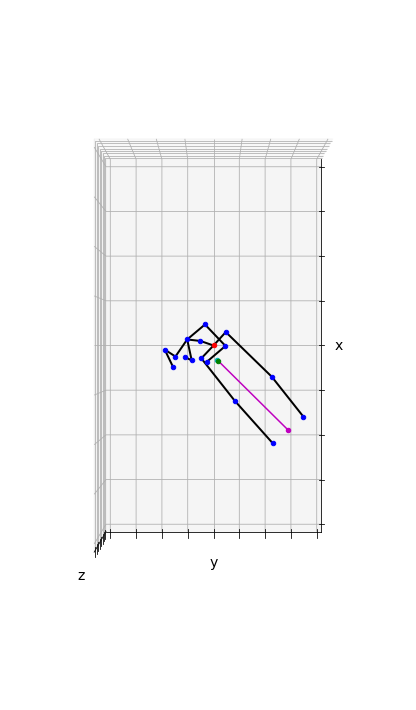

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    ax.scatter(ankle_to_center_x[0], ankle_to_center_y[0], ankle_to_center_z[0], color='c')
    # 重心
    ax.scatter(cog_df['cog_x'][0], cog_df['cog_y'][0], cog_df['cog_z'][0], color='green')
    #くるぶし中点
    ax.scatter(ankle_midpoint_x[0], ankle_midpoint_y[0], ankle_midpoint_z[0], color='m')
    ax.plot([ankle_midpoint_x[0],ankle_to_center_x[0]], [ankle_midpoint_y[0],ankle_to_center_y[0]], [ankle_midpoint_z[0],ankle_to_center_z[0]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)
    ax.view_init(elev=90, azim=0)
    plt.savefig('/content/drive/MyDrive/a.png')
show3Dpose(ax, coordinates[0])

くるぶしまで下ろした重心とくるぶし中点との距離

重心とくるぶしの距離の軌跡

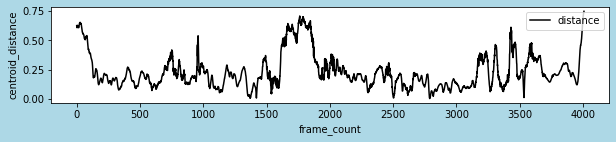

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = centroid_distance

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'centroid_distance'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

くるぶし高さの重心と重心の距離

In [ ]:
ankle_to_centroid_distance = np.sqrt((cog_df['cog_x'] - ankle_to_center_x)**2 + (cog_df['cog_y'] - ankle_to_center_y)**2 + (cog_df['cog_z'] - ankle_to_center_z)**2)

In [ ]:

ankle_to_centroid_distance

0       0.296904
1       0.297983
2       0.296942
3       0.302284
4       0.296510
          ...   
4004    0.240799
4005    0.237166
4006    0.231459
4007    0.226363
4008    0.224190
Length: 4009, dtype: float64

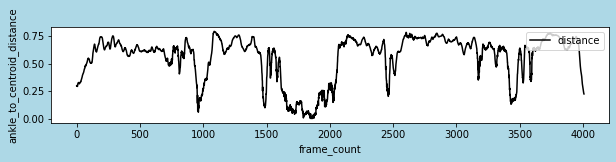

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = ankle_to_centroid_distance

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'ankle_to_centroid_distance'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

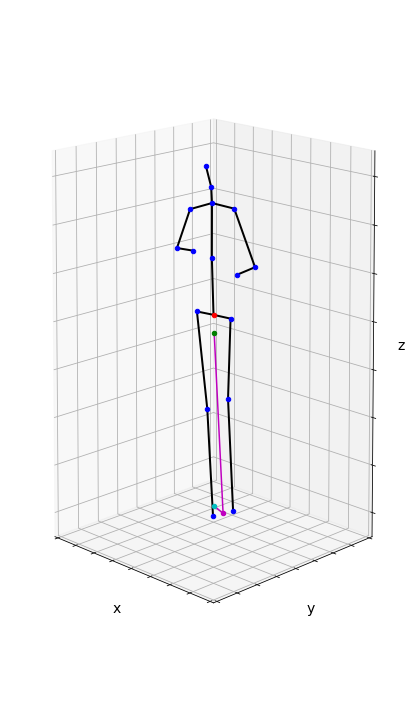

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=10., azim=135)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    ax.scatter(ankle_to_center_x[293], ankle_to_center_y[293], ankle_to_center_z[293], color='c')
    # 重心
    ax.scatter(cog_df['cog_x'][293], cog_df['cog_y'][293], cog_df['cog_z'][293], color='green')
    #くるぶし中点
    ax.scatter(ankle_midpoint_x[293], ankle_midpoint_y[293], ankle_midpoint_z[293], color='m')
    ax.plot([ankle_midpoint_x[293],cog_df['cog_x'][293]], [ankle_midpoint_y[293],cog_df['cog_y'][293]], [ankle_midpoint_z[293],cog_df['cog_z'][293]], "o-", color="m", ms=4, mew=0.5)
    ax.plot([ankle_midpoint_x[293],ankle_to_center_x[293]], [ankle_midpoint_y[293],ankle_to_center_y[293]], [ankle_midpoint_z[293],ankle_to_center_z[293]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

show3Dpose(ax, coordinates[293])

In [ ]:
coordinates[293].shape

(16, 3, 2)

In [ ]:
len([[0, 1], [1, 2], [2, 3], [0, 4], [4, 5],[5, 6], [0, 7], [7, 8], [8, 9], [9, 10],[8, 11], [11, 12], [12, 13], [8, 14], [14, 15], [15, 16]])

16

[[0.0, 0.0, 0.8831767]]


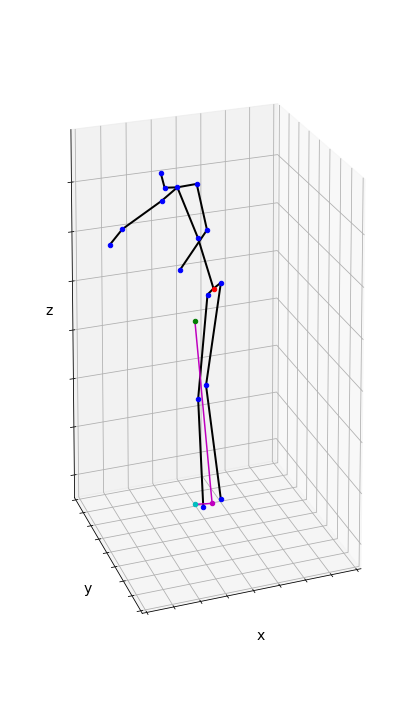

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=120)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=15., azim=70)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    ax.scatter(ankle_to_center_x[3000], ankle_to_center_y[3000], ankle_to_center_z[3000], color='c')
    # 重心
    ax.scatter(cog_df['cog_x'][3000], cog_df['cog_y'][3000], cog_df['cog_z'][3000], color='green')
    #くるぶし中点
    ax.scatter(ankle_midpoint_x[3000], ankle_midpoint_y[3000], ankle_midpoint_z[3000], color='m')
    ax.plot([ankle_midpoint_x[3000],cog_df['cog_x'][3000]], [ankle_midpoint_y[3000],cog_df['cog_y'][3000]], [ankle_midpoint_z[3000],cog_df['cog_z'][3000]], "o-", color="m", ms=4, mew=0.5)
    ax.plot([ankle_midpoint_x[3000],ankle_to_center_x[3000]], [ankle_midpoint_y[3000],ankle_to_center_y[3000]], [ankle_midpoint_z[3000],ankle_to_center_z[3000]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/check.png')
    return hip_coord
print(show3Dpose(ax, coordinates[3000]))

In [ ]:
list_

['RHip',
 'LHip',
 'RKnee',
 'LKnee',
 'RAnkle',
 'LAnkle',
 'Spine',
 'Neck',
 'RShoulder',
 'LShoulder',
 'RElbow',
 'RWrist',
 'LElbow',
 'LWrist',
 'Site',
 'Head']

両肩の中点と重心の距離の軌跡

In [ ]:
shoulder_midpoint_x = ((pd.DataFrame(coordinates[:,8,0,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,9,0,1], dtype='float64')[0])/2)
shoulder_midpoint_y = ((pd.DataFrame(coordinates[:,8,1,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,9,1,1], dtype='float64')[0])/2)
shoulder_midpoint_z = ((pd.DataFrame(coordinates[:,8,2,1], dtype='float64')[0] + pd.DataFrame(coordinates[:,9,2,1], dtype='float64')[0])/2)

In [ ]:
# 重心と肩中点の距離
center_to_shoulder_midpoint = np.sqrt((cog_df['cog_x'] - shoulder_midpoint_x)**2 + (cog_df['cog_y'] - shoulder_midpoint_y)**2 + (cog_df['cog_z'] - shoulder_midpoint_z)**2)

In [ ]:
center_to_shoulder_midpoint

0       0.366419
1       0.365487
2       0.365501
3       0.365961
4       0.366112
          ...   
4004    0.364427
4005    0.368211
4006    0.372569
4007    0.376835
4008    0.378496
Length: 4009, dtype: float64

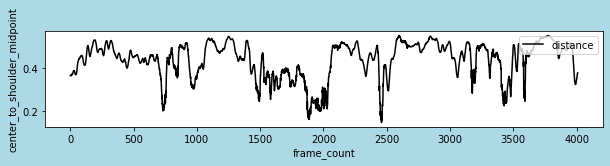

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = center_to_shoulder_midpoint

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'center_to_shoulder_midpoint'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

腰と重心の距離

In [ ]:
list_

['RHip',
 'LHip',
 'RKnee',
 'LKnee',
 'RAnkle',
 'LAnkle',
 'Spine',
 'Neck',
 'RShoulder',
 'LShoulder',
 'RElbow',
 'RWrist',
 'LElbow',
 'LWrist',
 'Site',
 'Head']

In [ ]:
hips_x = ((pd.DataFrame(coordinates[:,8,0,0], dtype='float64')[0] + pd.DataFrame(coordinates[:,9,0,0], dtype='float64')[0])/2)
hips_y = ((pd.DataFrame(coordinates[:,8,1,0], dtype='float64')[0] + pd.DataFrame(coordinates[:,9,1,0], dtype='float64')[0])/2)
hips_z = ((pd.DataFrame(coordinates[:,8,2,0], dtype='float64')[0] + pd.DataFrame(coordinates[:,9,2,0], dtype='float64')[0])/2)

In [ ]:
# 重心と肩中点の距離
center_to_hips_midpoint = np.sqrt((cog_df['cog_x'] - hips_x)**2 + (cog_df['cog_y'] - hips_y)**2 + (cog_df['cog_z'] - hips_z)**2)

In [ ]:
center_to_hips_midpoint

0       0.405365
1       0.403615
2       0.404307
3       0.405494
4       0.404411
          ...   
4004    0.389855
4005    0.394090
4006    0.398683
4007    0.403010
4008    0.405024
Length: 4009, dtype: float64

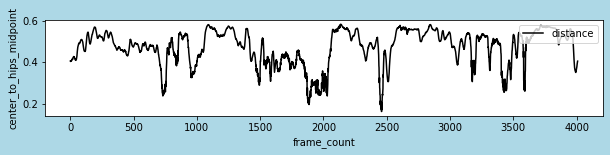

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = center_to_hips_midpoint

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'center_to_hips_midpoint'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

角度

In [ ]:

# 点A,B,Cの座標（3次元座標上の場合）

# 重心
a = np.array([cog_df['cog_x'][3000], cog_df['cog_y'][3000], cog_df['cog_z'][3000]])
#　くるぶし中点
b = np.array([ankle_midpoint_x[3000], ankle_midpoint_y[3000], ankle_midpoint_z[3000]])
# くるぶし高さの重心
c = np.array([ankle_to_center_x[3000], ankle_to_center_y[3000], ankle_to_center_z[3000]])

# ベクトルを定義
vec_a = a - b
vec_c = c - b

# コサインの計算
length_vec_a = np.linalg.norm(vec_a, ord=2)
length_vec_c = np.linalg.norm(vec_c, ord=2)
inner_product = np.inner(vec_a, vec_c)
cos = inner_product / (length_vec_a * length_vec_c)

# 角度（ラジアン）の計算
rad = np.arccos(cos)

# 弧度法から度数法（rad ➔ 度）への変換
degree = np.rad2deg(rad)

In [ ]:
vec_a

array([ 0.12419498, -0.0298301 ,  0.73918887])

In [ ]:
length_vec_a

0.7501429291757195

In [ ]:
degree

80.1964569083796

In [ ]:
rad

0.4346817470517157

In [ ]:
180 - 24.973111879449852779

155.02688812055015

# 両選手の座標で計算する

In [ ]:
import pandas as pd
import numpy as np
# 白選手の座標
whiteplayer_cog_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_center_coordinates.csv")
whiteplayer_loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/whiteplayer.npz')
# 青選手の座標
blueplayer_cog_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/blueplayer_all_center_coordinates.csv")
blueplayer_loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/buleplayer.npz')

In [ ]:
print("選手の各部位の座標")
print(whiteplayer_loaded['coordinates'].shape)
print(blueplayer_loaded['coordinates'].shape)
print("重心の座標")
print(whiteplayer_cog_df.shape)
print(blueplayer_cog_df.shape)

選手の各部位の座標
(4009, 16, 3, 2)
(4009, 16, 3, 2)
重心の座標
(4009, 3)
(4009, 3)


両選手の3dポーズ

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')
ax.view_init(elev=15., azim=125)

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=10., azim=40)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    #ax.scatter(ankle_to_center_x[293], ankle_to_center_y[293], ankle_to_center_z[293], color='c')
    # 重心
    #ax.scatter(cog_df['cog_x'][293], cog_df['cog_y'][293], cog_df['cog_z'][293], color='green')
    #くるぶし中点
    #ax.scatter(ankle_midpoint_x[293], ankle_midpoint_y[293], ankle_midpoint_z[293], color='m')
    #ax.plot([ankle_midpoint_x[293],cog_df['cog_x'][293]], [ankle_midpoint_y[293],cog_df['cog_y'][293]], [ankle_midpoint_z[293],cog_df['cog_z'][293]], "o-", color="m", ms=4, mew=0.5)
    #ax.plot([ankle_midpoint_x[293],ankle_to_center_x[293]], [ankle_midpoint_y[293],ankle_to_center_y[293]], [ankle_midpoint_z[293],ankle_to_center_z[293]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

show3Dpose(ax, whiteplayer_loaded['coordinates'][3400])

両選手の重心距離

In [ ]:
center_of_both_players = np.sqrt((whiteplayer_cog_df['cog_x'] - blueplayer_cog_df['cog_x'])**2+(whiteplayer_cog_df['cog_y'] - blueplayer_cog_df['cog_y'])**2+(whiteplayer_cog_df['cog_z'] - blueplayer_cog_df['cog_z'])**2)

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = center_of_both_players

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'center_of_both_players'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

両選手のくるぶし中点距離

In [ ]:
whiteplayer_ankle_midpoint_x = (whiteplayer_loaded['coordinates'][:,4,0,1]+whiteplayer_loaded['coordinates'][:,5,0,1])/2
whiteplayer_ankle_midpoint_y = (whiteplayer_loaded['coordinates'][:,4,1,1]+whiteplayer_loaded['coordinates'][:,5,1,1])/2
whiteplayer_ankle_midpoint_z = (whiteplayer_loaded['coordinates'][:,4,2,1]+whiteplayer_loaded['coordinates'][:,5,2,1])/2

blueplayer_ankle_midpoint_x = (blueplayer_loaded['coordinates'][:,4,0,1]+blueplayer_loaded['coordinates'][:,5,0,1])/2
blueplayer_ankle_midpoint_y = (blueplayer_loaded['coordinates'][:,4,1,1]+blueplayer_loaded['coordinates'][:,5,1,1])/2
blueplayer_ankle_midpoint_z = (blueplayer_loaded['coordinates'][:,4,2,1]+blueplayer_loaded['coordinates'][:,5,2,1])/2

bothplayer_ankle_midpoint_distance = np.sqrt((whiteplayer_ankle_midpoint_x - blueplayer_ankle_midpoint_x)**2+(whiteplayer_ankle_midpoint_y - blueplayer_ankle_midpoint_y)**2+(whiteplayer_ankle_midpoint_z - blueplayer_ankle_midpoint_z)**2)
bothplayer_ankle_midpoint_distance = pd.DataFrame(bothplayer_ankle_midpoint_distance,columns = ['bothplayer_ankle_midpoint_distance'])

In [ ]:
bothplayer_ankle_midpoint_distance

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y = bothplayer_ankle_midpoint_distance

c = 'black'
l= 'distance'

xl = 'frame_count'
yl1 = 'bothplayer_ankle_midpoint_distance'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y, color=c, label=l)

#各subplotにxラベルを追加
ax.set_xlabel(xl)

#各subplotにyラベルを追加
ax.set_ylabel(yl1)

# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

In [ ]:
# 白選手　右足ひく左足
whiteplayer_cog_df
whiteplayer_vector_x = whiteplayer_loaded['coordinates'][:,4,0,1] - whiteplayer_loaded['coordinates'][:,5,0,1]
whiteplayer_vector_y = whiteplayer_loaded['coordinates'][:,4,1,1] - whiteplayer_loaded['coordinates'][:,5,1,1]
whiteplayer_vector_z = whiteplayer_loaded['coordinates'][:,4,2,1] - whiteplayer_loaded['coordinates'][:,5,2,1]
# 青選手　左足ひく右足
blueplayer_cog_df
blueplayer_vector_x = blueplayer_loaded['coordinates'][:,5,0,1] - blueplayer_loaded['coordinates'][:,4,0,1]
blueplayer_vector_y = blueplayer_loaded['coordinates'][:,5,1,1] - blueplayer_loaded['coordinates'][:,4,1,1]
blueplayer_vector_z = blueplayer_loaded['coordinates'][:,5,2,1] - blueplayer_loaded['coordinates'][:,4,2,1]

In [ ]:
whiteplayer_vector_x.max()

In [ ]:
whiteplayer_vector_y.max()

In [ ]:
whiteplayer_vector_z.max()

In [ ]:
blueplayer_vector_x.max()

In [ ]:
blueplayer_vector_y.max()

In [ ]:
blueplayer_vector_z.max()

In [ ]:
movie_path = "/content/drive/MyDrive/Colab Notebooks/2018WCB_60_P2_SELLO Edwin_BOT_NAZIR BIN Abdou_MAD.mp4"

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

movie_cap = cv2.VideoCapture(movie_path)
movie_cap.set(cv2.CAP_PROP_POS_FRAMES, 4324)
ret, frame = movie_cap.read()

if not ret:
  print('no_maskimage')

cv2_imshow(frame)

In [ ]:
#　技失敗　1825
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=0, azim=90)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_loaded['coordinates'][:,5,0,1][3400], whiteplayer_loaded['coordinates'][:,5,1,1][3400], whiteplayer_loaded['coordinates'][:,5,2,1][3400], whiteplayer_vector_x[3400], whiteplayer_vector_y[3400], whiteplayer_vector_z[3400],
          color = "red", length = 3,
          arrow_length_ratio = 0.5, )
ax.scatter(whiteplayer_loaded['coordinates'][:,5,0,1][3400], whiteplayer_loaded['coordinates'][:,5,1,1][3400], whiteplayer_loaded['coordinates'][:,5,2,1][3400], label='whiteplayer_right_ankle_start', color='m') # 始点

ax.quiver(blueplayer_loaded['coordinates'][:,4,0,1][3400], blueplayer_loaded['coordinates'][:,4,1,1][3400], blueplayer_loaded['coordinates'][:,4,2,1][3400], blueplayer_vector_x[3400], blueplayer_vector_y[3400], blueplayer_vector_z[3400],
          color = "blue", length = 3,
          arrow_length_ratio = 0.5)
ax.scatter(blueplayer_loaded['coordinates'][:,4,0,1][3400], blueplayer_loaded['coordinates'][:,4,1,1][3400], blueplayer_loaded['coordinates'][:,4,2,1][3400], label='blueplayer_right_ankle_start', color='m') # 始点


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

movie_cap = cv2.VideoCapture(movie_path)
movie_cap.set(cv2.CAP_PROP_POS_FRAMES, 4306)
ret, frame = movie_cap.read()

if not ret:
  print('no_maskimage')

cv2_imshow(frame)

In [ ]:
#　技失敗　1850
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=0, azim=90)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_loaded['coordinates'][:,5,0,1][3410], whiteplayer_loaded['coordinates'][:,5,1,1][3410], whiteplayer_loaded['coordinates'][:,5,2,1][3410], whiteplayer_vector_x[3410], whiteplayer_vector_y[3410], whiteplayer_vector_z[3410],
          color = "red", length = 3,
          arrow_length_ratio = 0.5)
ax.scatter(whiteplayer_loaded['coordinates'][:,5,0,1][3410], whiteplayer_loaded['coordinates'][:,5,1,1][3410], whiteplayer_loaded['coordinates'][:,5,2,1][3410], label='whiteplayer_right_ankle_start', color='m') # 始点

ax.quiver(blueplayer_loaded['coordinates'][:,4,0,1][3410], blueplayer_loaded['coordinates'][:,4,1,1][3410], blueplayer_loaded['coordinates'][:,4,2,1][3410], blueplayer_vector_x[3410], blueplayer_vector_y[3410], blueplayer_vector_z[3410],
          color = "blue", length = 3,
          arrow_length_ratio = 0.5)
ax.scatter(blueplayer_loaded['coordinates'][:,4,0,1][3410], blueplayer_loaded['coordinates'][:,4,1,1][3410], blueplayer_loaded['coordinates'][:,4,2,1][3410], label='blueplayer_right_ankle_start', color='m') # 始点


両選手のくるぶし距離

In [ ]:
# 白選手　右、青選手　左
ankledistance_of_both_players_1 = np.sqrt((whiteplayer_loaded['coordinates'][:,4,0,1] - blueplayer_loaded['coordinates'][:,5,0,1])**2+(whiteplayer_loaded['coordinates'][:,4,1,1] - blueplayer_loaded['coordinates'][:,5,1,1])**2+(whiteplayer_loaded['coordinates'][:,4,2,1] - blueplayer_loaded['coordinates'][:,5,2,1])**2)

In [ ]:
# 白選手　左、青選手　右
ankledistance_of_both_players_2 = np.sqrt((whiteplayer_loaded['coordinates'][:,5,0,1] - blueplayer_loaded['coordinates'][:,4,0,1])**2+(whiteplayer_loaded['coordinates'][:,5,1,1] - blueplayer_loaded['coordinates'][:,4,1,1])**2+(whiteplayer_loaded['coordinates'][:,5,2,1] - blueplayer_loaded['coordinates'][:,4,2,1])**2)

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt


# x = np.arange(len(cog_df))
sta = 0
end = 4009
x = np.arange(end - sta)

y1,y2 = ankledistance_of_both_players_1, ankledistance_of_both_players_2

c1,c2 = 'black','green'
l1,l2 = 'whiteplayer rightankle', 'whiteplayer leftankle'

xl1, xl2= 'frame_count', 'frame_count'
yl1,yl2 = 'ankledistance_of_both_players_1', 'ankledistance_of_both_players_2'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (20,12), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax = fig.add_subplot(3, 1, 1)

#各subplot領域にデータを渡す
ax.plot(x, y1, color=c1, label=l1)
ax.plot(x, y2, color=c2, label=l2)
#各subplotにxラベルを追加
ax.set_xlabel(xl1)
ax.set_xlabel(xl2)
#各subplotにyラベルを追加
ax.set_ylabel(yl1)
ax.set_ylabel(yl2)
# 凡例表示
ax.legend(loc = 'upper right')

plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

movie_cap = cv2.VideoCapture(movie_path)
movie_cap.set(cv2.CAP_PROP_POS_FRAMES, 1835)
ret, frame = movie_cap.read()

if not ret:
  print('no_maskimage')

cv2_imshow(frame)

In [ ]:
### ２つのグラフを上下に並べて表示
import numpy as np
import matplotlib.pyplot as plt

sta = 0
end = 4009
# x = np.arange(len(cog_df))
x = np.arange(end - sta)

y1 = ankledistance_of_both_players_1
y2 = ankledistance_of_both_players_2


c1, c2 = 'blue', 'green'
l1, l2= 'x', 'y'

xl1, xl2 = 'frame_count', 'frame_count'
yl1, yl2= 'whiteplayer_rightankle', 'whiteplayer_leftankle'


#グラフを表示する領域を，figオブジェクトとして作成。
fig = plt.figure(figsize = (10,6), facecolor='lightblue')

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
#各subplot領域にデータを渡す
ax1.plot(x, y1, color=c1, label=l1)
ax2.plot(x, y2, color=c2, label=l2)

#各subplotにxラベルを追加
ax1.set_xlabel(xl1)
ax2.set_xlabel(xl2)

#各subplotにyラベルを追加
ax1.set_ylabel(yl1)
ax2.set_ylabel(yl2)

# 凡例表示
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.show()

In [ ]:
deviation_squared = 0
for num in range(len(ankledistance_of_both_players_1)):
  deviation_squared += (ankledistance_of_both_players_1[num] - ankledistance_of_both_players_2[num])**2

deviation_squared_mean = deviation_squared/len(ankledistance_of_both_players_1)
print(deviation_squared_mean)
print(np.sqrt(deviation_squared_mean))

In [ ]:
#　技失敗　1850
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation



def threed_plot(index):
  # FigureとAxes
  fig = plt.figure(figsize = (6, 6))
  ax = fig.add_subplot(111, projection='3d')
  ax.grid()
  ax.set_xlabel("x", fontsize = 16)
  ax.set_ylabel("y", fontsize = 16)
  ax.set_zlabel("z", fontsize = 16)
  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)
  ax.set_zlim(-1, 1)
  ax.view_init(elev=90, azim=0)

  # 原点Oを始点にベクトル(-2,3,2)を配置
  ax.quiver(whiteplayer_loaded['coordinates'][:,5,0,1][index], whiteplayer_loaded['coordinates'][:,5,1,1][index], whiteplayer_loaded['coordinates'][:,5,2,1][index], whiteplayer_vector_x[index], whiteplayer_vector_y[index], whiteplayer_vector_z[index],
            color = "red", length = 3,
            arrow_length_ratio = 0.5)
  ax.scatter(whiteplayer_loaded['coordinates'][:,5,0,1][index], whiteplayer_loaded['coordinates'][:,5,1,1][index], whiteplayer_loaded['coordinates'][:,5,2,1][index], label='whiteplayer_right_ankle_start', color='m') # 始点

  ax.quiver(blueplayer_loaded['coordinates'][:,4,0,1][index], blueplayer_loaded['coordinates'][:,4,1,1][index], blueplayer_loaded['coordinates'][:,4,2,1][index], blueplayer_vector_x[index], blueplayer_vector_y[index], blueplayer_vector_z[index],
            color = "blue", length = 3,
            arrow_length_ratio = 0.5)
  ax.scatter(blueplayer_loaded['coordinates'][:,4,0,1][index], blueplayer_loaded['coordinates'][:,4,1,1][index], blueplayer_loaded['coordinates'][:,4,2,1][index], label='blueplayer_right_ankle_start', color='m') # 始点

  plt.savefig(f'/content/{index}.png')
  plt.close()
for index in range(whiteplayer_loaded['coordinates'].shape[0]):
  threed_plot(index)

In [ ]:
from itertools import chain

columns_name_list = [[f"/content/{index}.png"] for index in range(whiteplayer_loaded['coordinates'].shape[0])]
column_names = list(chain(*columns_name_list))
print(column_names)

['/content/0.png', '/content/1.png', '/content/2.png', '/content/3.png', '/content/4.png', '/content/5.png', '/content/6.png', '/content/7.png', '/content/8.png', '/content/9.png', '/content/10.png', '/content/11.png', '/content/12.png', '/content/13.png', '/content/14.png', '/content/15.png', '/content/16.png', '/content/17.png', '/content/18.png', '/content/19.png', '/content/20.png', '/content/21.png', '/content/22.png', '/content/23.png', '/content/24.png', '/content/25.png', '/content/26.png', '/content/27.png', '/content/28.png', '/content/29.png', '/content/30.png', '/content/31.png', '/content/32.png', '/content/33.png', '/content/34.png', '/content/35.png', '/content/36.png', '/content/37.png', '/content/38.png', '/content/39.png', '/content/40.png', '/content/41.png', '/content/42.png', '/content/43.png', '/content/44.png', '/content/45.png', '/content/46.png', '/content/47.png', '/content/48.png', '/content/49.png', '/content/50.png', '/content/51.png', '/content/52.png', '/

In [ ]:
import glob as gl
import numpy as np
import cv2

# テストディレクトリにある「sam XXXX .csv」を取得する場合
name1 = gl.glob("/content/*.png")
name1 = sorted(name1, key=column_names.index)
print(len(name1))
#print(name1)
# テストディレクトリにある全ファイル名を取得する場合
# name2 = gl.glob("test/*")

coordinates = []
for i in range(0, len(name1)):
    filename = name1[i]
    print(filename)
    temp = cv2.imread(filename)
    coordinates.append(temp)
coordinates = np.array(coordinates)

4009
/content/0.png
/content/1.png
/content/2.png
/content/3.png
/content/4.png
/content/5.png
/content/6.png
/content/7.png
/content/8.png
/content/9.png
/content/10.png
/content/11.png
/content/12.png
/content/13.png
/content/14.png
/content/15.png
/content/16.png
/content/17.png
/content/18.png
/content/19.png
/content/20.png
/content/21.png
/content/22.png
/content/23.png
/content/24.png
/content/25.png
/content/26.png
/content/27.png
/content/28.png
/content/29.png
/content/30.png
/content/31.png
/content/32.png
/content/33.png
/content/34.png
/content/35.png
/content/36.png
/content/37.png
/content/38.png
/content/39.png
/content/40.png
/content/41.png
/content/42.png
/content/43.png
/content/44.png
/content/45.png
/content/46.png
/content/47.png
/content/48.png
/content/49.png
/content/50.png
/content/51.png
/content/52.png
/content/53.png
/content/54.png
/content/55.png
/content/56.png
/content/57.png
/content/58.png
/content/59.png
/content/60.png
/content/61.png
/content/62.p

In [ ]:
coordinates.shape

(4009, 432, 432, 3)

In [ ]:
np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/clipping_judo/fig_img', fig=coordinates)
loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/fig_img.npz')
print(np.array_equal(coordinates, loaded['fig']))

True


# 前後のフレームのくるぶし中点のベクトル
3400〜3410

935〜945

In [ ]:
import pandas as pd
import numpy as np
# 白選手の座標
whiteplayer_cog_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_center_coordinates.csv")
whiteplayer_loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/whiteplayer.npz')
# 青選手の座標
blueplayer_cog_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/blueplayer_all_center_coordinates.csv")
blueplayer_loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/buleplayer.npz')

In [ ]:
print(whiteplayer_loaded['coordinates'].shape)
whiteplayer_hip_midpoint_x_before = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3400]
whiteplayer_hip_midpoint_y_before = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3400]
whiteplayer_hip_midpoint_z_before = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3400]

whiteplayer_hip_midpoint_x_after = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3401]
whiteplayer_hip_midpoint_y_after = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3401]
whiteplayer_hip_midpoint_z_after = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3401]

(4009, 16, 3, 2)


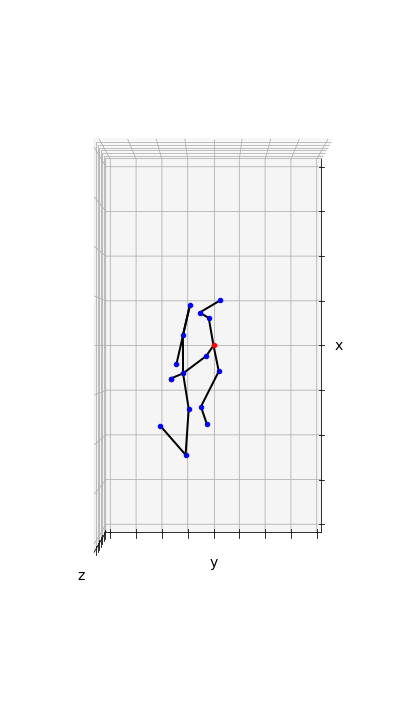

In [ ]:
from matplotlib import colors
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


dpi = 100
figsize = frame.shape[0] / float(dpi), frame.shape[1] / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')

connections = [[0, 1], [0, 2], [2, 4], [1, 3], [3, 5],
                   [6, 7], [7, 8], [8, 10], [10, 11], [7, 9], [9, 12],
                    [12, 13], [7, 14], [14, 15], [15, 16], [16, 17]]

def show3Dpose(ax, coord_data):
    ax.cla()
    ax.view_init(elev=90., azim=0)

    coord_list = []
    draw_list = []
    for e, c in enumerate(coord_data):
        x, y, z = c[0], c[1], c[2]

        #if e % 2 == 0:
        #ax.plot(x, y, z, lw=2)
        #ax.scatter(x, y, z)
        #ax.scatter(x[0], y[0], z[0], color='red')
        ax.scatter(x[1], y[1], z[1], color='blue')
        coord_list.append(x[1])
        coord_list.append(y[1])
        coord_list.append(z[1])
        draw_list.append([x, y, z])
        #ax.text(x[1], y[1], z[1], f"{e}", color='r')

    # 接続線の描画
    hip_coord = []
    for i in range(len(connections)):
        c = draw_list[i]
        x, y, z = c[0], c[1], c[2]

        ax.plot(x, y, z, lw=2, color='k')

        if i == 6: # 腰の中心を描画
            hip_coord.append([x[0], y[0], z[0]])
    hx, hy, hz = hip_coord[0][0], hip_coord[0][1], hip_coord[0][2]
    ax.scatter(hx, hy, hz, color='red')
    #　くるぶしに合わせた重心
    #ax.scatter(ankle_to_center_x[293], ankle_to_center_y[293], ankle_to_center_z[293], color='c')
    # 重心
    #ax.scatter(cog_df['cog_x'][293], cog_df['cog_y'][293], cog_df['cog_z'][293], color='green')
    #くるぶし中点
    #ax.scatter(ankle_midpoint_x[293], ankle_midpoint_y[293], ankle_midpoint_z[293], color='m')
    #ax.plot([ankle_midpoint_x[293],cog_df['cog_x'][293]], [ankle_midpoint_y[293],cog_df['cog_y'][293]], [ankle_midpoint_z[293],cog_df['cog_z'][293]], "o-", color="m", ms=4, mew=0.5)
    #ax.plot([ankle_midpoint_x[293],ankle_to_center_x[293]], [ankle_midpoint_y[293],ankle_to_center_y[293]], [ankle_midpoint_z[293],ankle_to_center_z[293]], "o-", color="m", ms=4, mew=0.5)
    # with open(csv_output, 'a') as csv_f:
    #     c_writer = csv.writer(csv_f)
    #     c_writer.writerow(coord_list)

    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    #ax.set_aspect('equal') # works fine in matplotlib==2.2.2

    # 軸ラベルを設定
    ax.set_xlabel("x", size = 14)
    ax.set_ylabel("y", size = 14)
    ax.set_zlabel("z", size = 14)

    #white = (1.0, 1.0, 1.0, 0.0)
    # ax.xaxis.set_pane_color(white)
    # ax.yaxis.set_pane_color(white)
    # ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

show3Dpose(ax, whiteplayer_loaded['coordinates'][3400])

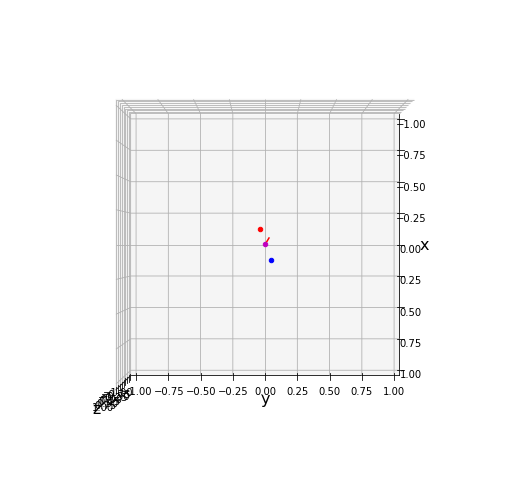

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=90, azim=0)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, whiteplayer_hip_midpoint_x_after - whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_after - whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_after - whiteplayer_hip_midpoint_z_before,
          color = "red", length = 100000,
          arrow_length_ratio = 0)

ax.scatter(whiteplayer_loaded['coordinates'][:,0,0,1][3400], whiteplayer_loaded['coordinates'][:,0,1,1][3400], whiteplayer_loaded['coordinates'][:,0,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='r')
ax.scatter(whiteplayer_loaded['coordinates'][:,1,0,1][3400], whiteplayer_loaded['coordinates'][:,1,1,1][3400], whiteplayer_loaded['coordinates'][:,1,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='b')

ax.scatter(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, label='whiteplayer_hip_midpoint_vector', color='m') # 始点

In [ ]:
print(whiteplayer_loaded['coordinates'].shape)
whiteplayer_hip_midpoint_x_before = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3400]
whiteplayer_hip_midpoint_y_before = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3400]
whiteplayer_hip_midpoint_z_before = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3400]

whiteplayer_hip_midpoint_x_after = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3402]
whiteplayer_hip_midpoint_y_after = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3402]
whiteplayer_hip_midpoint_z_after = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3402]

(4009, 16, 3, 2)


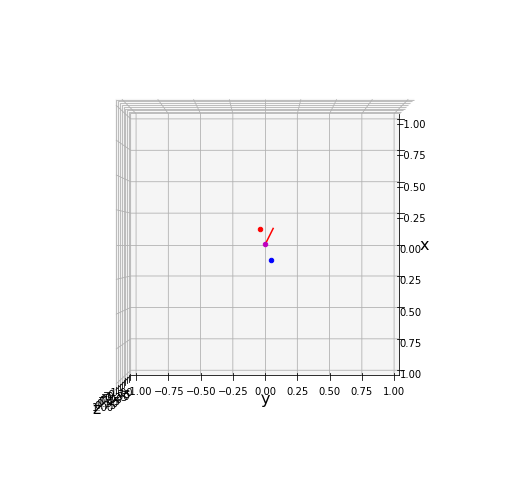

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=90, azim=0)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, whiteplayer_hip_midpoint_x_after - whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_after - whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_after - whiteplayer_hip_midpoint_z_before,
          color = "red", length = 1000,
          arrow_length_ratio = 0)

ax.scatter(whiteplayer_loaded['coordinates'][:,0,0,1][3400], whiteplayer_loaded['coordinates'][:,0,1,1][3400], whiteplayer_loaded['coordinates'][:,0,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='r')
ax.scatter(whiteplayer_loaded['coordinates'][:,1,0,1][3400], whiteplayer_loaded['coordinates'][:,1,1,1][3400], whiteplayer_loaded['coordinates'][:,1,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='b')

ax.scatter(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, label='whiteplayer_hip_midpoint_vector', color='m') # 始点

In [ ]:
print(whiteplayer_loaded['coordinates'].shape)
whiteplayer_hip_midpoint_x_before = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3400]
whiteplayer_hip_midpoint_y_before = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3400]
whiteplayer_hip_midpoint_z_before = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3400]

whiteplayer_hip_midpoint_x_after = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3403]
whiteplayer_hip_midpoint_y_after = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3403]
whiteplayer_hip_midpoint_z_after = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3403]

(4009, 16, 3, 2)


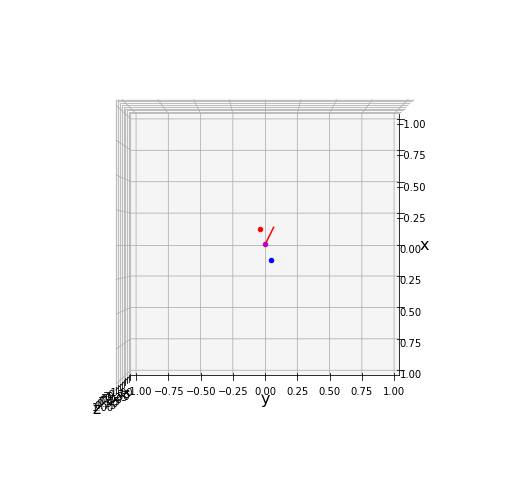

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=90, azim=0)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, whiteplayer_hip_midpoint_x_after - whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_after - whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_after - whiteplayer_hip_midpoint_z_before,
          color = "red", length = 1000,
          arrow_length_ratio = 0)

ax.scatter(whiteplayer_loaded['coordinates'][:,0,0,1][3400], whiteplayer_loaded['coordinates'][:,0,1,1][3400], whiteplayer_loaded['coordinates'][:,0,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='r')
ax.scatter(whiteplayer_loaded['coordinates'][:,1,0,1][3400], whiteplayer_loaded['coordinates'][:,1,1,1][3400], whiteplayer_loaded['coordinates'][:,1,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='b')

ax.scatter(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, label='whiteplayer_hip_midpoint_vector', color='m') # 始点

In [ ]:
print(whiteplayer_loaded['coordinates'].shape)
whiteplayer_hip_midpoint_x_before = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3400]
whiteplayer_hip_midpoint_y_before = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3400]
whiteplayer_hip_midpoint_z_before = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3400]

whiteplayer_hip_midpoint_x_after = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3404]
whiteplayer_hip_midpoint_y_after = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3404]
whiteplayer_hip_midpoint_z_after = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3404]

(4009, 16, 3, 2)


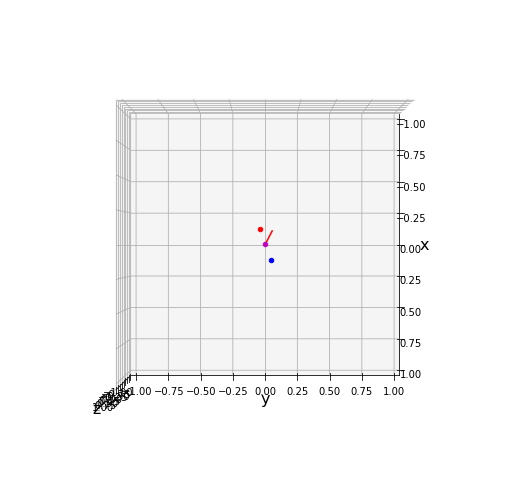

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=90, azim=0)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, whiteplayer_hip_midpoint_x_after - whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_after - whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_after - whiteplayer_hip_midpoint_z_before,
          color = "red", length = 1000,
          arrow_length_ratio = 0)

ax.scatter(whiteplayer_loaded['coordinates'][:,0,0,1][3400], whiteplayer_loaded['coordinates'][:,0,1,1][3400], whiteplayer_loaded['coordinates'][:,0,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='r')
ax.scatter(whiteplayer_loaded['coordinates'][:,1,0,1][3400], whiteplayer_loaded['coordinates'][:,1,1,1][3400], whiteplayer_loaded['coordinates'][:,1,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='b')

ax.scatter(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, label='whiteplayer_hip_midpoint_vector', color='m') # 始点

In [ ]:
print(whiteplayer_loaded['coordinates'].shape)
whiteplayer_hip_midpoint_x_before = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3400]
whiteplayer_hip_midpoint_y_before = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3400]
whiteplayer_hip_midpoint_z_before = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3400]

whiteplayer_hip_midpoint_x_after = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3405]
whiteplayer_hip_midpoint_y_after = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3405]
whiteplayer_hip_midpoint_z_after = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3405]

(4009, 16, 3, 2)


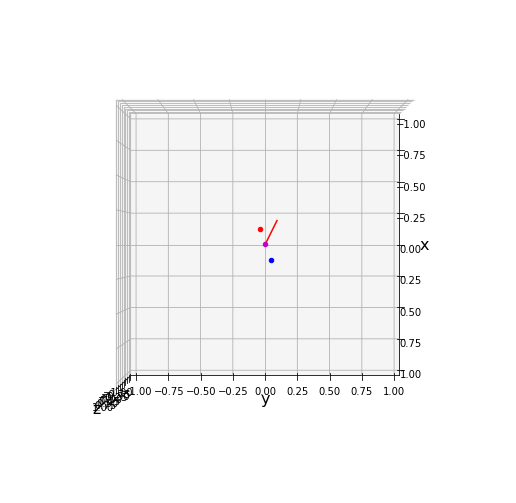

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=90, azim=0)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, whiteplayer_hip_midpoint_x_after - whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_after - whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_after - whiteplayer_hip_midpoint_z_before,
          color = "red", length = 1000,
          arrow_length_ratio = 0)

ax.scatter(whiteplayer_loaded['coordinates'][:,0,0,1][3400], whiteplayer_loaded['coordinates'][:,0,1,1][3400], whiteplayer_loaded['coordinates'][:,0,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='r')
ax.scatter(whiteplayer_loaded['coordinates'][:,1,0,1][3400], whiteplayer_loaded['coordinates'][:,1,1,1][3400], whiteplayer_loaded['coordinates'][:,1,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='b')

ax.scatter(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, label='whiteplayer_hip_midpoint_vector', color='m') # 始点

In [ ]:
print(whiteplayer_loaded['coordinates'].shape)
whiteplayer_hip_midpoint_x_before = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3400]
whiteplayer_hip_midpoint_y_before = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3400]
whiteplayer_hip_midpoint_z_before = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3400]

whiteplayer_hip_midpoint_x_after = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3406]
whiteplayer_hip_midpoint_y_after = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3406]
whiteplayer_hip_midpoint_z_after = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3406]

(4009, 16, 3, 2)


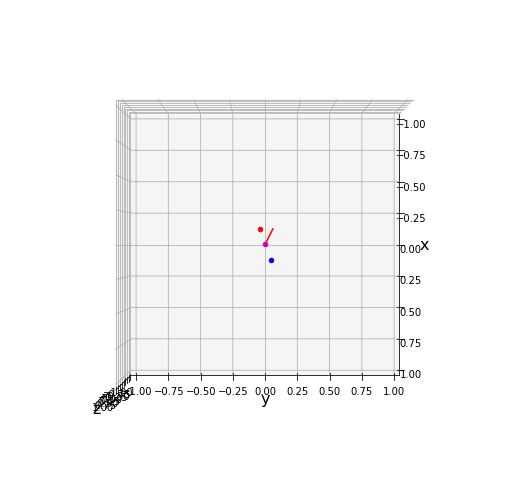

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=90, azim=0)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, whiteplayer_hip_midpoint_x_after - whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_after - whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_after - whiteplayer_hip_midpoint_z_before,
          color = "red", length = 1000,
          arrow_length_ratio = 0)

ax.scatter(whiteplayer_loaded['coordinates'][:,0,0,1][3400], whiteplayer_loaded['coordinates'][:,0,1,1][3400], whiteplayer_loaded['coordinates'][:,0,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='r')
ax.scatter(whiteplayer_loaded['coordinates'][:,1,0,1][3400], whiteplayer_loaded['coordinates'][:,1,1,1][3400], whiteplayer_loaded['coordinates'][:,1,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='b')

ax.scatter(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, label='whiteplayer_hip_midpoint_vector', color='m') # 始点

In [ ]:
print(whiteplayer_loaded['coordinates'].shape)
whiteplayer_hip_midpoint_x_before = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3400]
whiteplayer_hip_midpoint_y_before = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3400]
whiteplayer_hip_midpoint_z_before = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3400]

whiteplayer_hip_midpoint_x_after = ((whiteplayer_loaded['coordinates'][:,0,0,1] + whiteplayer_loaded['coordinates'][:,1,0,1])/2)[3407]
whiteplayer_hip_midpoint_y_after = ((whiteplayer_loaded['coordinates'][:,0,1,1] + whiteplayer_loaded['coordinates'][:,1,1,1])/2)[3407]
whiteplayer_hip_midpoint_z_after = ((whiteplayer_loaded['coordinates'][:,0,2,1] + whiteplayer_loaded['coordinates'][:,1,2,1])/2)[3407]

(4009, 16, 3, 2)


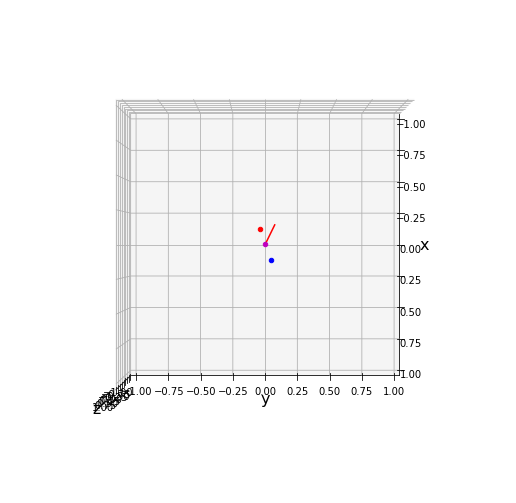

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# FigureとAxes
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=90, azim=0)

# 原点Oを始点にベクトル(-2,3,2)を配置
ax.quiver(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, whiteplayer_hip_midpoint_x_after - whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_after - whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_after - whiteplayer_hip_midpoint_z_before,
          color = "red", length = 1000,
          arrow_length_ratio = 0)

ax.scatter(whiteplayer_loaded['coordinates'][:,0,0,1][3400], whiteplayer_loaded['coordinates'][:,0,1,1][3400], whiteplayer_loaded['coordinates'][:,0,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='r')
ax.scatter(whiteplayer_loaded['coordinates'][:,1,0,1][3400], whiteplayer_loaded['coordinates'][:,1,1,1][3400], whiteplayer_loaded['coordinates'][:,1,2,1][3400], label='whiteplayer_hip_midpoint_vector', color='b')

ax.scatter(whiteplayer_hip_midpoint_x_before, whiteplayer_hip_midpoint_y_before, whiteplayer_hip_midpoint_z_before, label='whiteplayer_hip_midpoint_vector', color='m') # 始点

ラズパイ

In [ ]:
import numpy as np

loaded = np.load('/content/drive/MyDrive/Colab Notebooks/clipping_judo/fig_img.npz')

In [ ]:
loaded['fig'].shape

(4009, 432, 432, 3)

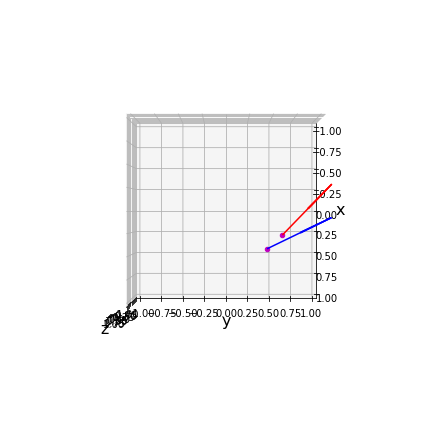

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(loaded['fig'][0])

In [ ]:
loaded['fig'][0].shape

(432, 432, 3)

In [ ]:
range(loaded['fig'].shape[0])

In [ ]:
import glob
import cv2 as cv
#sorted(glob.glob(dir_path + '/*.jpg'))
def create_movie(dir_path):
    output = dir_path + '/fig.mp4'
    fourcc = cv.VideoWriter_fourcc(*'mp4v')
    outfh = cv.VideoWriter(output, fourcc, 25, (432, 432))
    for im in range(loaded['fig'].shape[0]):
        outfh.write(loaded['fig'][im])
    outfh.release()

if __name__ == '__main__':
    create_movie('/content')

In [ ]:
raz = [[0.1,0.3,"person"],[0.2,0.5,"tv"],[0.4,0.6,"manga"]]

In [ ]:
raz = [[0.2,0.5,"tv"],[0.1,0.3,"person"],[0.4,0.6,"manga"]]

In [ ]:
raz = [[0.4,0.6,"manga"],[0.2,0.5,"tv"],[0.1,0.3,"person"]]

In [ ]:
raz = []

In [ ]:
raz = [[0.4,0.6,"manga"],[0.2,0.5,"tv"]]

In [ ]:
raz.shape

In [ ]:
raz[0][2]

In [ ]:
if raz[2][2] == 'person':
  print('ok')
  if raz[1][2] == "tv" or "manga":
    print('good')
if raz[1][2] == 'person':
  print('ok')